# Load the relabeled calsses, pcs and v_exp of the climo data

In [1]:
import xarray as xr
# import numpy as np

data_dir = 'D:/VScode/Last_deglaciation/climo_ana_data'
ds_sat = xr.open_dataset(data_dir + '/ds_GMM_climo_relabeled.nc')

ds_sat.info



<bound method Dataset.info of <xarray.Dataset>
Dimensions:                (age: 65, lat: 96, lon: 144)
Coordinates:
  * lat                    (lat) float32 -90.0 -88.11 -86.21 ... 88.11 90.0
  * lon                    (lon) float32 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5
  * age                    (age) float32 1.11e+04 1.13e+04 ... 2.37e+04 2.39e+04
Data variables:
    sat                    (age, lat, lon) float32 ...
    sat_std                (age, lat, lon) float32 ...
    sat_centered           (age, lat, lon) float32 ...
    weight                 (lat) float32 ...
    sat_centered_weighted  (age, lat, lon) float32 ...
    class_label            (lat, lon) int64 ...
    class_relabeled        (lat, lon) int32 ...>

# Load the weighted average from the ensemble data

In [2]:
# read the all_weighted_avg_curves
import pickle
with open('ens_ana_data/all_weighted_avg_curves_checked.pkl', 'rb') as f:
    all_weighted_avg_curves = pickle.load(f)

# Load classified TraCE data 

In [3]:
# read the TraCE_data/ds_TraCE_EOFs_GMM.nc

import xarray as xr
import numpy as np

ds_TraCE_EOFs_GMM = xr.open_dataset('TraCE_data/ds_TraCE_EOFs_GMM.nc')

# read the reshaped_probs_TraCE_GMM
reshaped_probs_TraCE_GMM = np.load('TraCE_data/reshaped_probs_TraCE_GMM.npy')

class_labels = ds_TraCE_EOFs_GMM['class_label'].values  # Ensure this is your class label data

n_components = 4
# Define a new class label for low probabilities
low_prob_label = n_components  # Assuming this is the next integer after your max class label

# Update class_labels for locations where prob < 0.9 to the new class
class_labels_updated = np.where(reshaped_probs_TraCE_GMM < 0.56, low_prob_label, class_labels)

# class_labels_updated got shape (48,96), which is the same as the (lat, lon) shape of the ds_TraCE_EOFs_GMM['class_label']
# please store class_labels_updated to ds_TraCE_EOFs_GMM['class_labels_updated']

ds_TraCE_EOFs_GMM['class_labels_updated'] = (('lat', 'lon'), class_labels_updated)

# print the unique values of class_labels_updated
print(np.unique(class_labels_updated))
ds_TraCE_EOFs_GMM.info



[0 1 2 3 4]


<bound method Dataset.info of <xarray.Dataset>
Dimensions:                (age: 2204, lat: 48, lon: 96)
Coordinates:
  * lat                    (lat) float64 -87.16 -83.48 -79.78 ... 83.48 87.16
  * lon                    (lon) float64 0.0 3.75 7.5 ... 348.8 352.5 356.2
  * age                    (age) float64 2.2e+04 2.199e+04 ... -20.0 -30.0
Data variables:
    sat                    (age, lat, lon) float32 ...
    sat_centered           (age, lat, lon) float32 ...
    weight                 (lat) float64 ...
    sat_centered_weighted  (age, lat, lon) float64 ...
    class_label            (lat, lon) int64 2 2 2 2 2 2 2 2 ... 2 2 2 2 2 2 2 2
    class_labels_updated   (lat, lon) int64 2 2 2 2 2 2 2 2 ... 2 2 2 2 2 2 2 2
Attributes:
    Conventions:               CF-1.0
    source:                    CAM
    case:                      b30.22_0kaDVT
    title:                     b30.22_0kaDVT b30.22_0kaDVT
    logname:                   fenghe
    host:                      phoenix
  

# Calculate the weighted average of TraCE

In [4]:
# load the TraCE_weighted_avg
import pickle
with open('data_fig2/TraCE_weighted_avg.pkl', 'rb') as f:
    TraCE_weighted_avg = pickle.load(f)

In [13]:
# # save TraCE_weighted_avg to data_fig2
# import pickle
# with open('data_fig2/TraCE_weighted_avg.pkl', 'wb') as f:
#     pickle.dump(TraCE_weighted_avg, f)

In [ ]:
# from toolbox import GMM_functions as gf
# import importlib
# importlib.reload(gf) 

# TraCE_weighted_avg=gf.plot_weighted_average_curve(ds_TraCE_EOFs_GMM.copy(), label_var_name='class_labels_updated',dpi=100)

In [5]:
import numpy as np

cp_age_bootstrap = np.array([20926, 16932, 17101, 16894])
cp_age_bootstrap_CI = np.array([
    [21270, 20813],
    [17358, 16813],
    [17190, 17010],
    [17142, 16647]
])


# Plot

\Progress:100.0% done[==============================================================]
pospr_diff_max_index: 13
cps [15. 25. 30. 37. 45.]
selected_cp_index: 0
|Progress:100.0% done[==============================================================]
pospr_diff_max_index: 33
cps [15. 23. 33. 40. 48.]
selected_cp_index: 2
/Progress:100.0% done[==============================================================]
pospr_diff_max_index: 33
cps [ 7. 14. 30. 34. 51.]
selected_cp_index: 3
-Progress:100.0% done[==============================================================]
pospr_diff_max_index: 34
cps [17. 26. 35. 42.]
selected_cp_index: 2


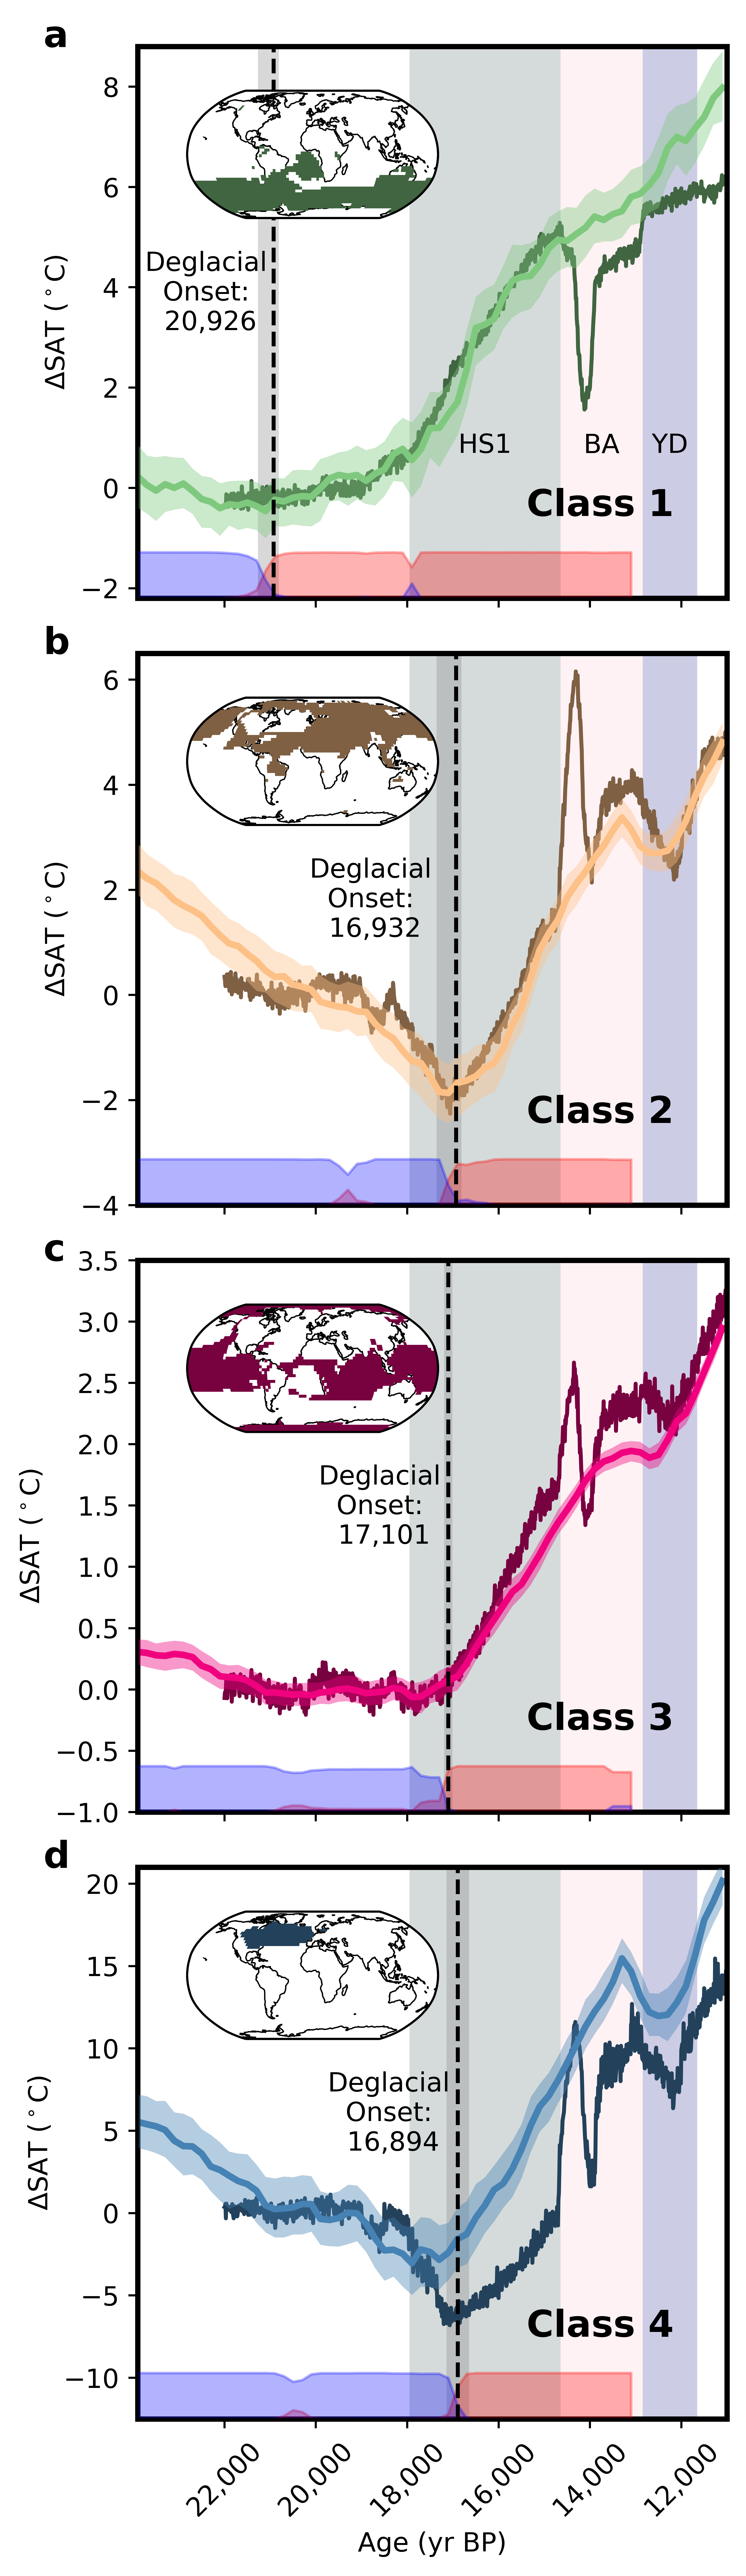

In [22]:
import importlib
import numpy as np
import matplotlib.pyplot as plt
from toolbox import change_point_functions as cpf
importlib.reload(cpf)
from matplotlib.colors import ListedColormap
import cartopy.crs as ccrs
import matplotlib.colors as mcolors
import matplotlib.ticker as mticker

fig, axs = plt.subplots(4, 1, figsize=(4, 16.2), dpi=900, sharex=True)

if len(all_weighted_avg_curves[0]) <= 4:
    custom_colors = [
        (0.4980392156862745, 0.788235294117647, 0.4980392156862745),
        (0.9921568627450981, 0.7529411764705882, 0.5254901960784314),
        (0.9411764705882353, 0.00784313725490196, 0.4980392156862745),
        (0.27450980392156865, 0.5098039215686274, 0.7058823529411765),
    ]
    cmap = ListedColormap(custom_colors)
else:
    cmap = plt.get_cmap('Accent', len(all_weighted_avg_curves[0]))

custom_colors_1 = [
    (0.24901960784313726, 0.3941176470588235, 0.24901960784313726),
    (0.49607843137254903, 0.3764705882352941, 0.2627450980392157),
    (0.47058823529411764, 0.00392156862745098, 0.24901960784313726),
    (0.13725490196078433, 0.2549019607843137, 0.35294117647058826),
]
cmap1 = ListedColormap(custom_colors_1)

# Climate transitions timing
HS1 = np.array([18000, 14692]) - 50
BA = np.array([14692, 12896]) - 50
YD = np.array([12896, 11703]) - 50

ylims = [[-2.2, 8.8], [-4, 6.5], [-1, 3.5], [-12.5, 21]]

# =====================
# 1) PLOT THE MAIN 4 SUBPLOTS
# =====================
for i in range(4):
    ax1 = axs[i]

    weighted_avg_curves_k = [
        curves[i] for curves in all_weighted_avg_curves if i in curves
    ]

    # Normalize
    for j in range(len(weighted_avg_curves_k)):
        data = weighted_avg_curves_k[j]
        data_18100_21000 = np.mean(data[35:55])
        data = data - data_18100_21000
        weighted_avg_curves_k[j] = data

    weighted_avg_curves_k_25th = np.percentile(weighted_avg_curves_k, 25, axis=0)
    weighted_avg_curves_k_75th = np.percentile(weighted_avg_curves_k, 75, axis=0)
    weighted_avg_curves_k_median = np.median(weighted_avg_curves_k, axis=0)

    cp_info = cpf.find_cp(weighted_avg_curves_k_median, ds_sat['age'].values, rb_plot=False)
    slpSgnPosPr = cp_info['slpSgnPosPr']
    age = cp_info['age']
    cp_age = cp_info['cp_age']

    ax1.set_ylim(ylims[i])
    
    # Plot climate transitions
    ax1.axvspan(HS1[1], HS1[0], color='darkslategray', alpha=0.2, lw=0)
    ax1.axvspan(BA[1], BA[0], color='pink', alpha=0.2, lw=0)
    ax1.axvspan(YD[1], YD[0], color='navy', alpha=0.2, lw=0)

    # Plot TraCE data
    TraCE_base = np.mean(TraCE_weighted_avg[i][0:401])
    ax1.plot(
        ds_TraCE_EOFs_GMM['age'],
        (TraCE_weighted_avg[i] - TraCE_base) * 1.6,
        color=cmap1(i),
        linewidth=1.5,
        linestyle='-',
        zorder=2,
    )






    # # Change point marker
    # ax1.errorbar(
    #     cp_age_bootstrap[i],
    #     np.min(ax1.get_ylim()) + 0.11 * (np.max(ax1.get_ylim()) - np.min(ax1.get_ylim())),
    #     fmt='^',
    #     color='k',
    #     markersize=7,
    #     capsize=5,
    #     capthick=2,
    #     elinewidth=2,
    # )

    if i == 0:
        ax1.text(
            x=np.mean(HS1),
            y=np.min(ax1.get_ylim()) + 0.3 * (np.max(ax1.get_ylim()) - np.min(ax1.get_ylim())),
            s='HS1',
            ha='center',
            va='top',
        )
        ax1.text(
            x=np.mean(BA),
            y=np.min(ax1.get_ylim()) + 0.3 * (np.max(ax1.get_ylim()) - np.min(ax1.get_ylim())),
            s='BA',
            ha='center',
            va='top',
        )
        ax1.text(
            x=np.mean(YD),
            y=np.min(ax1.get_ylim()) + 0.3 * (np.max(ax1.get_ylim()) - np.min(ax1.get_ylim())),
            s='YD',
            ha='center',
            va='top',
        )

    # Fill between percentiles
    ax1.fill_between(
        ds_sat['age'].values,
        weighted_avg_curves_k_25th,
        weighted_avg_curves_k_75th,
        color=cmap(i),
        alpha=0.4,
        linewidth=0,
        zorder=3,
    )

    ax1.plot(ds_sat['age'], weighted_avg_curves_k_median, color=cmap(i), linewidth=2.5)


    if i == 3:
        ax1.set_xlabel('Age (yr BP)')
    ax1.set_xlim([11000, 23900])
    ax1.invert_xaxis()
    # Use a custom formatter to put commas in the tick labels
    ax1.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f"{int(x):,}"))
    # rotate the xtick labels
    ax1.tick_params(axis='x', rotation=45)

    ax1.set_ylabel('ΔSAT ($^\circ$C)', color='k')

    for spine in ax1.spines.values():
        spine.set_linewidth(2)

    # Twin axis for probabilities
    ax2 = ax1.twinx()
    ax2.set_ylim([0, 12])
    ax2.set_yticks([])
    ax2.set_yticklabels([])

    ax2.fill_between(age, slpSgnPosPr, color='r', alpha=0.3)
    ax2.fill_between(age, 1 - slpSgnPosPr, color='b', alpha=0.3)
    ax2.axvline(x=cp_age_bootstrap[i], color='k', linestyle='--')

    # plot a vertical grey rectangle for the 95% CI (cp_age_bootstrap_CI) with the high matchs the y limit
    ax1.fill_betweenx(ylims[i], cp_age_bootstrap_CI[i][0], cp_age_bootstrap_CI[i][1], color='grey', alpha=0.3,edgecolor='none')

    # age_text = str(int(cp_age_bootstrap[i]))
    # ax2.text(
    #     x=cp_age + 1500,
    #     y=0.63 * (np.max(ax2.get_ylim())-np.min(ax2.get_ylim())),
    #     s='Deglacial\nOnset:\n ' + age_text,
    #     ha='center',
    #     va='top',
    # )


    age_text = f"{int(cp_age_bootstrap[i]):,}"
    ax2.text(
        x=cp_age + 1500,
        y=0.63 * (np.max(ax2.get_ylim()) - np.min(ax2.get_ylim())),
        s='Deglacial\nOnset:\n ' + age_text,
        ha='center',
        va='top',
    )


    ax1.text(
        x=-0.16,
        y=1.05,
        s=chr(97 + i),
        transform=ax1.transAxes,
        fontsize=14,
        fontweight='bold',
        va='top',
    )

    ax1.text(
        x=0.66,
        y=0.2,
        s='Class '+str(i+1),
        transform=ax1.transAxes,
        fontsize=14,
        fontweight='bold',
        va='top',
    )

# =====================
# 2) FOR EACH CLASS (0 to 3), PLOT A SMALL FLOATING MAP
#    ON TOP OF THE CORRESPONDING SUBPLOT
# =====================

# We'll define a list of top positions for each subplot, from top to bottom
# You can adjust these positions to ensure the maps don't overlap.
map_positions = [0.75, 0.553, 0.356, 0.159]

# Get lat/lon from ds_sat
sat_lat = ds_sat['lat'].values
sat_lon = ds_sat['lon'].values
sat_lon2d, sat_lat2d = np.meshgrid(sat_lon, sat_lat)
class_labels_sat = ds_sat['class_relabeled'].values

# Get lat/lon from ds_TraCE_EOFs_GMM
trace_lat = ds_TraCE_EOFs_GMM['lat'].values
trace_lon = ds_TraCE_EOFs_GMM['lon'].values
trace_lon2d, trace_lat2d = np.meshgrid(trace_lon, trace_lat)
class_labels_trace = ds_TraCE_EOFs_GMM['class_labels_updated'].values

for c in range(4):
    # # 2.1) Create an axis for the LGMR data
    ax_map_sat = fig.add_axes([0.19, map_positions[c], 0.33, 0.19],  # [left, bottom, width, height]
                              projection=ccrs.Robinson())
    ax_map_sat.set_global()
    ax_map_sat.coastlines(linewidth=0.5)
    
    # # Mask for class == c in ds_sat
    # sat_class_mask = np.where(class_labels_sat == c, 1, np.nan)
    # cmap_sat_one = ListedColormap([cmap(c)])  # single color from the main colormap
    
    # ax_map_sat.pcolormesh(sat_lon2d, sat_lat2d, sat_class_mask, 
    #                       shading='auto', cmap=cmap_sat_one, alpha=0.5,
    #                       transform=ccrs.PlateCarree())

    # 2.2) Create a second axis on top of the same area for TraCE data
    ax_map_trace = fig.add_axes([0.19, map_positions[c], 0.33, 0.19], 
                                projection=ccrs.Robinson())
    ax_map_trace.set_global()
    # Make the facecolor transparent, so we see "through" it.
    ax_map_trace.set_facecolor('none')

    # Mask for class == c in TraCE
    trace_class_mask = np.where(class_labels_trace == c, 1, np.nan)
    cmap_trace_one = ListedColormap([cmap1(c)])  # single color from the second colormap
    
    ax_map_trace.pcolormesh(trace_lon2d, trace_lat2d, trace_class_mask, 
                            shading='auto', cmap=cmap_trace_one, alpha=1,
                            transform=ccrs.PlateCarree())

plt.subplots_adjust(hspace=0.1)
plt.show()


-Progress:100.0% done[==============================================================]
pospr_diff_max_index: 13
cps [15. 25. 30. 37. 45.]
selected_cp_index: 0
\Progress:100.0% done[==============================================================]
pospr_diff_max_index: 33
cps [14. 23. 33. 40. 48.]
selected_cp_index: 2
|Progress:100.0% done[==============================================================]
pospr_diff_max_index: 33
cps [ 7. 14. 34. 51.]
selected_cp_index: 2
/Progress:100.0% done[==============================================================]
pospr_diff_max_index: 34
cps [17. 26. 35. 42.]
selected_cp_index: 2


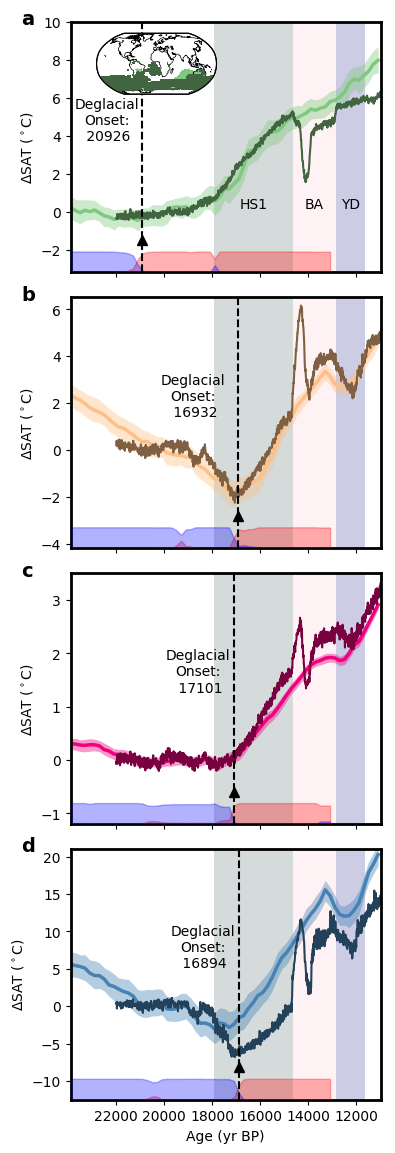

In [6]:
import importlib
import numpy as np
import matplotlib.pyplot as plt
from toolbox import change_point_functions as cpf
importlib.reload(cpf)
from matplotlib.colors import ListedColormap
import cartopy.crs as ccrs
import matplotlib.colors as mcolors

fig, axs = plt.subplots(4, 1, figsize=(4, 14), dpi=100, sharex=True)

if len(all_weighted_avg_curves[0]) <= 4:
    custom_colors = [
        (0.4980392156862745, 0.788235294117647, 0.4980392156862745),
        (0.9921568627450981, 0.7529411764705882, 0.5254901960784314),
        (0.9411764705882353, 0.00784313725490196, 0.4980392156862745),
        (0.27450980392156865, 0.5098039215686274, 0.7058823529411765),
    ]
    cmap = ListedColormap(custom_colors)
else:
    cmap = plt.get_cmap('Accent', len(all_weighted_avg_curves[0]))

custom_colors_1 = [
    (0.24901960784313726, 0.3941176470588235, 0.24901960784313726),
    (0.49607843137254903, 0.3764705882352941, 0.2627450980392157),
    (0.47058823529411764, 0.00392156862745098, 0.24901960784313726),
    (0.13725490196078433, 0.2549019607843137, 0.35294117647058826),
]
cmap1 = ListedColormap(custom_colors_1)

# Climate transitions timing
HS1 = np.array([18000, 14692]) - 50
BA = np.array([14692, 12896]) - 50
YD = np.array([12896, 11703]) - 50

ylims = [[-3.2, 10], [-4.2, 6.5], [-1.2, 3.5], [-12.5, 21]]

for i in range(4):
    ax1 = axs[i]

    weighted_avg_curves_k = [
        curves[i] for curves in all_weighted_avg_curves if i in curves
    ]

    # Normalize
    for j in range(len(weighted_avg_curves_k)):
        data = weighted_avg_curves_k[j]
        data_18100_21000 = np.mean(data[35:55])
        data = data - data_18100_21000
        weighted_avg_curves_k[j] = data

    weighted_avg_curves_k_25th = np.percentile(weighted_avg_curves_k, 25, axis=0)
    weighted_avg_curves_k_75th = np.percentile(weighted_avg_curves_k, 75, axis=0)
    weighted_avg_curves_k_median = np.median(weighted_avg_curves_k, axis=0)

    cp_info = cpf.find_cp(weighted_avg_curves_k_median, ds_sat['age'].values, rb_plot=False)
    slpSgnPosPr = cp_info['slpSgnPosPr']
    age = cp_info['age']
    cp_age = cp_info['cp_age']

    ax1.set_ylim(ylims[i])
    # Plot climate transitions
    ax1.axvspan(HS1[1], HS1[0], color='darkslategray', alpha=0.2, lw=0)
    ax1.axvspan(BA[1], BA[0], color='pink', alpha=0.2, lw=0)
    ax1.axvspan(YD[1], YD[0], color='navy', alpha=0.2, lw=0)

    # Change point marker
    ax1.errorbar(
        cp_age_bootstrap[i],
        np.min(ax1.get_ylim()) + 0.129 * (np.max(ax1.get_ylim()) - np.min(ax1.get_ylim())),
        fmt='^',
        color='k',
        markersize=7,
        capsize=5,
        capthick=2,
        elinewidth=2,
    )

    if i == 0:
        ax1.text(
            x=np.mean(HS1),
            y=np.min(ax1.get_ylim()) + 0.3 * (np.max(ax1.get_ylim()) - np.min(ax1.get_ylim())),
            s='HS1',
            ha='center',
            va='top',
        )
        ax1.text(
            x=np.mean(BA),
            y=np.min(ax1.get_ylim()) + 0.3 * (np.max(ax1.get_ylim()) - np.min(ax1.get_ylim())),
            s='BA',
            ha='center',
            va='top',
        )
        ax1.text(
            x=np.mean(YD),
            y=np.min(ax1.get_ylim()) + 0.3 * (np.max(ax1.get_ylim()) - np.min(ax1.get_ylim())),
            s='YD',
            ha='center',
            va='top',
        )

    # Fill between percentiles
    ax1.fill_between(
        ds_sat['age'].values,
        weighted_avg_curves_k_25th,
        weighted_avg_curves_k_75th,
        color=cmap(i),
        alpha=0.4,
        linewidth=0,
    )

    ax1.plot(ds_sat['age'], weighted_avg_curves_k_median, color=cmap(i), linewidth=2.5)

    # Plot TraCE data
    TraCE_base = np.mean(TraCE_weighted_avg[i][0:401])
    ax1.plot(
        ds_TraCE_EOFs_GMM['age'],
        (TraCE_weighted_avg[i] - TraCE_base) * 1.6,
        color=cmap1(i),
        linewidth=1.5,
        linestyle='-',
    )

    if i == 3:
        ax1.set_xlabel('Age (yr BP)')
    ax1.set_xlim([11000, 23900])
    ax1.invert_xaxis()
    ax1.set_ylabel('ΔSAT ($^\circ$C)', color='k')

    for spine in ax1.spines.values():
        spine.set_linewidth(2)

    # Twin axis for probabilities
    ax2 = ax1.twinx()
    ax2.set_ylim([0, 12])
    ax2.set_yticks([])
    ax2.set_yticklabels([])

    ax2.fill_between(age, slpSgnPosPr, color='r', alpha=0.3)
    ax2.fill_between(age, 1 - slpSgnPosPr, color='b', alpha=0.3)
    ax2.axvline(x=cp_age_bootstrap[i], color='k', linestyle='--')

    age_text = str(int(cp_age_bootstrap[i]))
    ax2.text(
        x=cp_age + 1500,
        y=0.7 * np.max(ax2.get_ylim()),
        s='Deglacial\nOnset:\n ' + age_text,
        ha='center',
        va='top',
    )

    ax1.text(
        x=-0.16,
        y=1.05,
        s=chr(97 + i),
        transform=ax1.transAxes,
        fontsize=14,
        fontweight='bold',
        va='top',
    )

# Now plot the map. We'll have two axes at the same position.
# Main axis with coastlines and one dataset (e.g., TraCE).
ax_map = fig.add_axes([0.19, 0.7, 0.3, 0.3], projection=ccrs.Robinson())
ax_map.coastlines(linewidth=0.5)
ax_map.set_global()

# ds_sat data (96x144)
sat_lat = ds_sat['lat'].values
sat_lon = ds_sat['lon'].values
sat_lon2d, sat_lat2d = np.meshgrid(sat_lon, sat_lat)
class_labels_sat = ds_sat['class_relabeled'].values

# Mask for class 0 in ds_sat
sat_class0_mask = np.where(class_labels_sat == 0, 1, np.nan)
class0_color = cmap(0)  # color for class 0
cmap_sat_class0 = ListedColormap([class0_color])  # single red color for class 0 in ds_sat

ax_map.pcolormesh(sat_lon2d, sat_lat2d, sat_class0_mask, shading='auto',
                      cmap=cmap_sat_class0, alpha=1, transform=ccrs.PlateCarree())












# Create a second axis at the same position for ds_sat data (96x144)
ax_map_trace = fig.add_axes([0.19, 0.7, 0.3, 0.3], projection=ccrs.Robinson())
ax_map_trace.set_global()

# Make the facecolor of the second axis transparent
ax_map_trace.set_facecolor('none')

# TraCE data (48x96)
trace_lat = ds_TraCE_EOFs_GMM['lat'].values
trace_lon = ds_TraCE_EOFs_GMM['lon'].values
trace_lon2d, trace_lat2d = np.meshgrid(trace_lon, trace_lat)
class_labels_trace = ds_TraCE_EOFs_GMM['class_labels_updated'].values

# Plot the TraCE class labels directly with a colormap where class 0 is class0_color and others white
# For simplicity, let's just assume class_labels_trace is 0 or something else:
# If needed, create a mask:
trace_class0_mask = np.where(class_labels_trace == 0, 1, np.nan)
class0_color = cmap1(0)  # color for class 0
cmap_trace_class0 = ListedColormap([class0_color])  # single color for class 0

ax_map_trace.pcolormesh(trace_lon2d, trace_lat2d, trace_class0_mask, shading='auto',
                  cmap=cmap_trace_class0, alpha=1, transform=ccrs.PlateCarree())


plt.subplots_adjust(hspace=0.1)
plt.show()

-Progress:100.0% done[==============================================================]
pospr_diff_max_index: 13
cps [15. 25. 30. 37. 45.]
selected_cp_index: 0
\Progress:100.0% done[==============================================================]
pospr_diff_max_index: 33
cps [14. 23. 33. 40. 48.]
selected_cp_index: 2
|Progress:100.0% done[==============================================================]
pospr_diff_max_index: 33
cps [ 7. 14. 34. 51.]
selected_cp_index: 2
/Progress:100.0% done[==============================================================]
pospr_diff_max_index: 34
cps [17. 26. 35. 42.]
selected_cp_index: 2


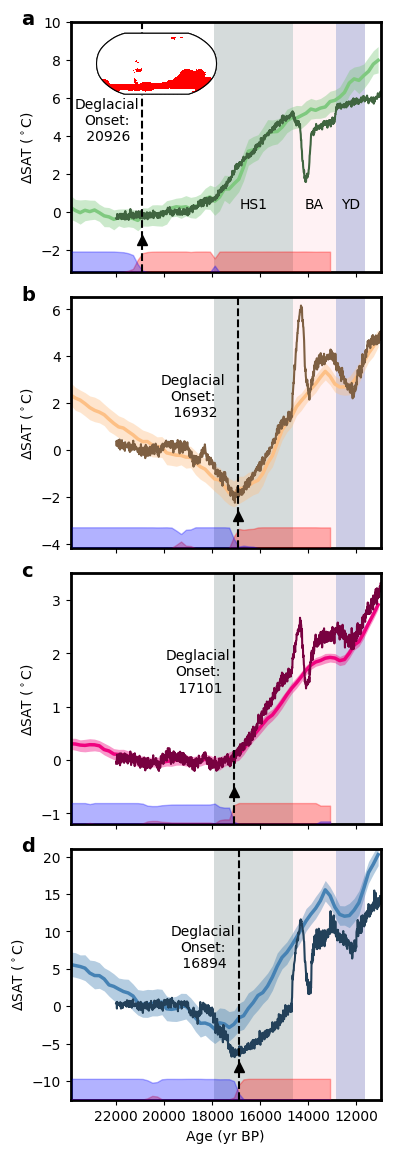

In [98]:
import importlib
import numpy as np
import matplotlib.pyplot as plt
from toolbox import change_point_functions as cpf
importlib.reload(cpf)
from matplotlib.colors import ListedColormap
import cartopy.crs as ccrs
import matplotlib.colors as mcolors

fig, axs = plt.subplots(4, 1, figsize=(4, 14), dpi=100, sharex=True)

if len(all_weighted_avg_curves[0]) <= 4:
    custom_colors = [
        (0.4980392156862745, 0.788235294117647, 0.4980392156862745),
        (0.9921568627450981, 0.7529411764705882, 0.5254901960784314),
        (0.9411764705882353, 0.00784313725490196, 0.4980392156862745),
        (0.27450980392156865, 0.5098039215686274, 0.7058823529411765),
    ]
    cmap = ListedColormap(custom_colors)
else:
    cmap = plt.get_cmap('Accent', len(all_weighted_avg_curves[0]))

custom_colors_1 = [
    (0.24901960784313726, 0.3941176470588235, 0.24901960784313726),
    (0.49607843137254903, 0.3764705882352941, 0.2627450980392157),
    (0.47058823529411764, 0.00392156862745098, 0.24901960784313726),
    (0.13725490196078433, 0.2549019607843137, 0.35294117647058826),
]
cmap1 = ListedColormap(custom_colors_1)

# Climate transitions timing
HS1 = np.array([18000, 14692]) - 50
BA = np.array([14692, 12896]) - 50
YD = np.array([12896, 11703]) - 50

ylims = [[-3.2, 10], [-4.2, 6.5], [-1.2, 3.5], [-12.5, 21]]

for i in range(4):
    ax1 = axs[i]

    weighted_avg_curves_k = [
        curves[i] for curves in all_weighted_avg_curves if i in curves
    ]

    # Normalize
    for j in range(len(weighted_avg_curves_k)):
        data = weighted_avg_curves_k[j]
        data_18100_21000 = np.mean(data[35:55])
        data = data - data_18100_21000
        weighted_avg_curves_k[j] = data

    weighted_avg_curves_k_25th = np.percentile(weighted_avg_curves_k, 25, axis=0)
    weighted_avg_curves_k_75th = np.percentile(weighted_avg_curves_k, 75, axis=0)
    weighted_avg_curves_k_median = np.median(weighted_avg_curves_k, axis=0)

    cp_info = cpf.find_cp(weighted_avg_curves_k_median, ds_sat['age'].values, rb_plot=False)
    slpSgnPosPr = cp_info['slpSgnPosPr']
    age = cp_info['age']
    cp_age = cp_info['cp_age']

    ax1.set_ylim(ylims[i])
    # Plot climate transitions
    ax1.axvspan(HS1[1], HS1[0], color='darkslategray', alpha=0.2, lw=0)
    ax1.axvspan(BA[1], BA[0], color='pink', alpha=0.2, lw=0)
    ax1.axvspan(YD[1], YD[0], color='navy', alpha=0.2, lw=0)

    # Change point marker
    ax1.errorbar(
        cp_age_bootstrap[i],
        np.min(ax1.get_ylim()) + 0.129 * (np.max(ax1.get_ylim()) - np.min(ax1.get_ylim())),
        fmt='^',
        color='k',
        markersize=7,
        capsize=5,
        capthick=2,
        elinewidth=2,
    )

    if i == 0:
        ax1.text(
            x=np.mean(HS1),
            y=np.min(ax1.get_ylim()) + 0.3 * (np.max(ax1.get_ylim()) - np.min(ax1.get_ylim())),
            s='HS1',
            ha='center',
            va='top',
        )
        ax1.text(
            x=np.mean(BA),
            y=np.min(ax1.get_ylim()) + 0.3 * (np.max(ax1.get_ylim()) - np.min(ax1.get_ylim())),
            s='BA',
            ha='center',
            va='top',
        )
        ax1.text(
            x=np.mean(YD),
            y=np.min(ax1.get_ylim()) + 0.3 * (np.max(ax1.get_ylim()) - np.min(ax1.get_ylim())),
            s='YD',
            ha='center',
            va='top',
        )

    # Fill between percentiles
    ax1.fill_between(
        ds_sat['age'].values,
        weighted_avg_curves_k_25th,
        weighted_avg_curves_k_75th,
        color=cmap(i),
        alpha=0.4,
        linewidth=0,
    )

    ax1.plot(ds_sat['age'], weighted_avg_curves_k_median, color=cmap(i), linewidth=2.5)

    # Plot TraCE data
    TraCE_base = np.mean(TraCE_weighted_avg[i][0:401])
    ax1.plot(
        ds_TraCE_EOFs_GMM['age'],
        (TraCE_weighted_avg[i] - TraCE_base) * 1.6,
        color=cmap1(i),
        linewidth=1.5,
        linestyle='-',
    )

    if i == 3:
        ax1.set_xlabel('Age (yr BP)')
    ax1.set_xlim([11000, 23900])
    ax1.invert_xaxis()
    ax1.set_ylabel('ΔSAT ($^\circ$C)', color='k')

    for spine in ax1.spines.values():
        spine.set_linewidth(2)

    # Twin axis for probabilities
    ax2 = ax1.twinx()
    ax2.set_ylim([0, 12])
    ax2.set_yticks([])
    ax2.set_yticklabels([])

    ax2.fill_between(age, slpSgnPosPr, color='r', alpha=0.3)
    ax2.fill_between(age, 1 - slpSgnPosPr, color='b', alpha=0.3)
    ax2.axvline(x=cp_age_bootstrap[i], color='k', linestyle='--')

    age_text = str(int(cp_age_bootstrap[i]))
    ax2.text(
        x=cp_age + 1500,
        y=0.7 * np.max(ax2.get_ylim()),
        s='Deglacial\nOnset:\n ' + age_text,
        ha='center',
        va='top',
    )

    ax1.text(
        x=-0.16,
        y=1.05,
        s=chr(97 + i),
        transform=ax1.transAxes,
        fontsize=14,
        fontweight='bold',
        va='top',
    )

# Now plot the map. We'll have two axes at the same position.
# Main axis with coastlines and one dataset (e.g., TraCE).
ax_map = fig.add_axes([0.19, 0.7, 0.3, 0.3], projection=ccrs.Robinson())
ax_map.coastlines()
ax_map.set_global()

custom_colors_temp = [
    cmap(0),
    (1,1,1),
    (1,1,1),
    (1,1,1)
    
    ]
cmap_temp = ListedColormap(custom_colors_temp)

# TraCE data (48x96)
trace_lat = ds_TraCE_EOFs_GMM['lat'].values
trace_lon = ds_TraCE_EOFs_GMM['lon'].values
trace_lon2d, trace_lat2d = np.meshgrid(trace_lon, trace_lat)
class_labels_trace = ds_TraCE_EOFs_GMM['class_labels_updated'].values
# trace_class0_mask = np.where(class_labels_trace == 0, 1, np.nan)

ax_map.pcolormesh(trace_lon2d, trace_lat2d, class_labels_trace, shading='auto',
                  cmap=cmap_temp, alpha=1, transform=ccrs.PlateCarree())

#

# Create a second axis at the same position for ds_sat data (96x144)
ax_map_sat = fig.add_axes([0.19, 0.7, 0.3, 0.3], projection=ccrs.Robinson())
ax_map_sat.set_global()

# Make the facecolor of the second axis transparent
ax_map_sat.set_facecolor('none')

# # Remove coastlines, borders, and gridlines from the second axis
# ax_map_sat.coastlines(alpha=0)  # or just don't call coastlines at all
# # ax_map_sat.outline_patch.set_visible(False)
# ax_map_sat.gridlines().left_labels = False
# ax_map_sat.gridlines().right_labels = False
# ax_map_sat.gridlines().top_labels = False
# ax_map_sat.gridlines().bottom_labels = False

# ds_sat data (96x144)
sat_lat = ds_sat['lat'].values
sat_lon = ds_sat['lon'].values
sat_lon2d, sat_lat2d = np.meshgrid(sat_lon, sat_lat)
class_labels_sat = ds_sat['class_relabeled'].values
# sat_class0_mask = np.where(class_labels_sat == 0, 1, np.nan)

custom_colors_temp_sat = [
    (1,0,0,1),
    (1,1,1,0),
    (1,1,1,0),
    (1,1,1,0)
    
    ]
cmap_temp_sat = ListedColormap(custom_colors_temp_sat)

ax_map_sat.pcolormesh(sat_lon2d, sat_lat2d, class_labels_sat, shading='auto',
                      cmap=cmap_temp_sat, alpha=1, transform=ccrs.PlateCarree())


plt.subplots_adjust(hspace=0.1)
plt.show()


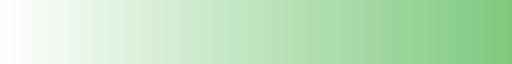

In [75]:
new_cmap

In [72]:
trace_class0_mask
print(np.unique(trace_class0_mask))

[ 1. nan]


In [70]:
# print the unique values in class_labels_trace
print(np.unique(class_labels_trace))

[0 1 2 3 4]


-Progress:100.0% done[==============================================================]
pospr_diff_max_index: 13
cps [15. 25. 30. 37. 45.]
selected_cp_index: 0
\Progress:100.0% done[==============================================================]
pospr_diff_max_index: 33
cps [14. 23. 33. 40. 48.]
selected_cp_index: 2
|Progress:100.0% done[==============================================================]
pospr_diff_max_index: 33
cps [ 7. 14. 34. 51.]
selected_cp_index: 2
/Progress:100.0% done[==============================================================]
pospr_diff_max_index: 34
cps [17. 26. 35. 42.]
selected_cp_index: 2


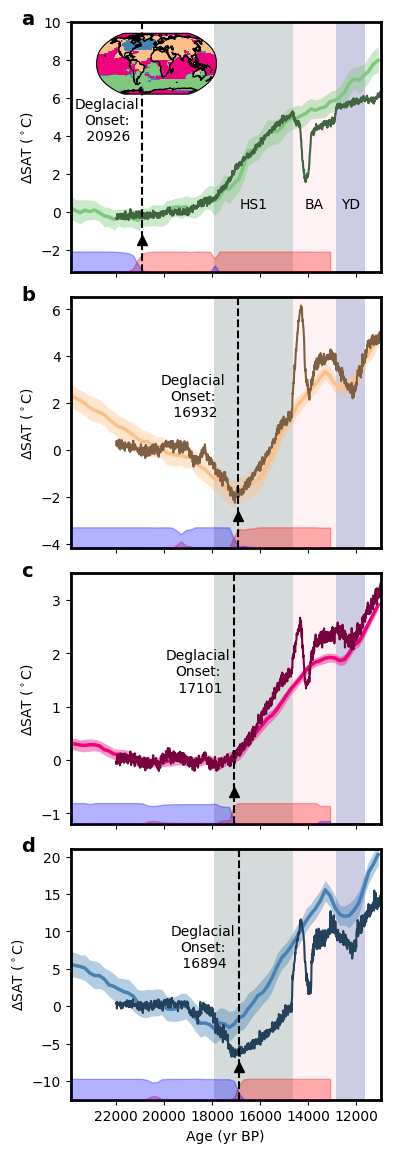

In [56]:
import importlib
import numpy as np
import matplotlib.pyplot as plt
from toolbox import change_point_functions as cpf
importlib.reload(cpf)
from matplotlib.colors import ListedColormap
import cartopy.crs as ccrs

# Create a figure with 4 rows and 1 column
fig, axs = plt.subplots(4, 1, figsize=(4, 14), dpi=100, sharex=True)

if len(all_weighted_avg_curves[0]) <= 4:
    custom_colors = [
        (0.4980392156862745, 0.788235294117647, 0.4980392156862745),
        (0.9921568627450981, 0.7529411764705882, 0.5254901960784314),
        (0.9411764705882353, 0.00784313725490196, 0.4980392156862745),
        (0.27450980392156865, 0.5098039215686274, 0.7058823529411765),
    ]
    cmap = ListedColormap(custom_colors)
else:
    cmap = plt.get_cmap('Accent', len(all_weighted_avg_curves[0]))

custom_colors_1 = [
    (0.24901960784313726, 0.3941176470588235, 0.24901960784313726),
    (0.49607843137254903, 0.3764705882352941, 0.2627450980392157),
    (0.47058823529411764, 0.00392156862745098, 0.24901960784313726),
    (0.13725490196078433, 0.2549019607843137, 0.35294117647058826),
]
cmap1 = ListedColormap(custom_colors_1)

# Climate transitions timing
HS1 = np.array([18000, 14692]) - 50  # Convert to b1950
BA = np.array([14692, 12896]) - 50
YD = np.array([12896, 11703]) - 50

ylims = [[-3.2, 10], [-4.2, 6.5], [-1.2, 3.5], [-12.5, 21]]

# Loop through the range 0 to 3
for i in range(4):
    ax1 = axs[i]

    weighted_avg_curves_k = [
        curves[i] for curves in all_weighted_avg_curves if i in curves
    ]

    # Loop through each data and normalize
    for j in range(len(weighted_avg_curves_k)):
        data = weighted_avg_curves_k[j]
        data_18100_21000 = np.mean(data[35:55])
        data = data - data_18100_21000
        weighted_avg_curves_k[j] = data

    # Calculate percentiles
    weighted_avg_curves_k_5th = np.percentile(weighted_avg_curves_k, 5, axis=0)
    weighted_avg_curves_k_25th = np.percentile(weighted_avg_curves_k, 25, axis=0)
    weighted_avg_curves_k_75th = np.percentile(weighted_avg_curves_k, 75, axis=0)
    weighted_avg_curves_k_95th = np.percentile(weighted_avg_curves_k, 95, axis=0)

    # Calculate median
    weighted_avg_curves_k_median = np.median(weighted_avg_curves_k, axis=0)

    # Calculate cp_info
    cp_info = cpf.find_cp(weighted_avg_curves_k_median, ds_sat['age'].values, rb_plot=False)
    cpOccPr = cp_info['cpOccPr']
    slpSgnPosPr = cp_info['slpSgnPosPr']
    age = cp_info['age']
    cp_age = cp_info['cp_age']
    cp_age_CI = cp_info['cp_age_CI']
    cp_age_all = cp_info['cp_age_all']

    ax1.set_ylim(ylims[i])

    # Plot climate transitions
    ax1.axvspan(HS1[1], HS1[0], color='darkslategray', alpha=0.2, lw=0)
    ax1.axvspan(BA[1], BA[0], color='pink', alpha=0.2, lw=0)
    ax1.axvspan(YD[1], YD[0], color='navy', alpha=0.2, lw=0)

    # # Plot change points
    # cp_age_all = np.delete(cp_age_all, np.where(cp_age_all == cp_age))
    # ax1.plot(
    #     cp_age_all,
    #     np.min(ax1.get_ylim()) + 0.129 * (np.max(ax1.get_ylim()) - np.min(ax1.get_ylim())) * np.ones_like(cp_age_all),
    #     marker='^',
    #     markersize=7,
    #     color='k',
    #     linestyle='None',
    # )
    ax1.errorbar(
        cp_age_bootstrap[i],
        np.min(ax1.get_ylim()) + 0.129 * (np.max(ax1.get_ylim()) - np.min(ax1.get_ylim())),
        fmt='^',
        color='k',
        markersize=7,
        capsize=5,
        capthick=2,
        elinewidth=2,
    )

    if i == 0:
        ax1.text(
            x=np.mean(HS1),
            y=np.min(ax1.get_ylim()) + 0.3 * (np.max(ax1.get_ylim()) - np.min(ax1.get_ylim())),
            s='HS1',
            ha='center',
            va='top',
        )
        ax1.text(
            x=np.mean(BA),
            y=np.min(ax1.get_ylim()) + 0.3 * (np.max(ax1.get_ylim()) - np.min(ax1.get_ylim())),
            s='BA',
            ha='center',
            va='top',
        )
        ax1.text(
            x=np.mean(YD),
            y=np.min(ax1.get_ylim()) + 0.3 * (np.max(ax1.get_ylim()) - np.min(ax1.get_ylim())),
            s='YD',
            ha='center',
            va='top',
        )

    # Fill between percentiles
    ax1.fill_between(
        ds_sat['age'].values,
        weighted_avg_curves_k_25th,
        weighted_avg_curves_k_75th,
        color=cmap(i),
        alpha=0.4,
        linewidth=0,
    )

    ax1.plot(ds_sat['age'], weighted_avg_curves_k_median, color=cmap(i), linewidth=2.5)

    # Calculate and plot TraCE data
    TraCE_base = np.mean(TraCE_weighted_avg[i][0:401])
    ax1.plot(
        ds_TraCE_EOFs_GMM['age'],
        (TraCE_weighted_avg[i] - TraCE_base) * 1.6,
        color=cmap1(i),
        linewidth=1.5,
        linestyle='-',
    )

    # Set x-axis label only for the bottom subplot
    if i == 3:
        ax1.set_xlabel('Age (yr BP)')
    ax1.set_xlim([11000, 23900])
    ax1.invert_xaxis()
    ax1.set_ylabel('ΔSAT ($^\circ$C)', color='k')

    # Customize spines
    for spine in ax1.spines.values():
        spine.set_linewidth(2)

    # Twin axis for probabilities
    ax2 = ax1.twinx()
    ax2.set_ylim([0, 12])
    ax2.set_yticks([])
    ax2.set_yticklabels([])

    # Fill areas under probabilities
    ax2.fill_between(age, slpSgnPosPr, color='r', alpha=0.3)
    ax2.fill_between(age, 1 - slpSgnPosPr, color='b', alpha=0.3)
    ax2.axvline(x=cp_age_bootstrap[i], color='k', linestyle='--')

    # Add text for change point age
    age_text = str(int(cp_age_bootstrap[i]))
    ax2.text(
        x=cp_age + 1500,
        y=0.7 * np.max(ax2.get_ylim()),
        s='Deglacial\nOnset:\n ' + age_text,
        ha='center',
        va='top',
    )

    # Add subplot labels
    ax1.text(
        x=-0.16,
        y=1.05,
        s=chr(97 + i),
        transform=ax1.transAxes,
        fontsize=14,
        fontweight='bold',
        va='top',
    )


ax_robinson = fig.add_axes([0.19, 0.7, 0.3, 0.3], projection=ccrs.Robinson())
ax_robinson.coastlines()
ax_robinson.set_global()

# Generating meshgrid for lon-lat with one additional point in each dimension
lon, lat = np.meshgrid(np.linspace(ds_TraCE_EOFs_GMM.lon.min(), ds_TraCE_EOFs_GMM.lon.max(), len(ds_TraCE_EOFs_GMM.lon)), 
                       np.linspace(ds_TraCE_EOFs_GMM.lat.min(), ds_TraCE_EOFs_GMM.lat.max(), len(ds_TraCE_EOFs_GMM.lat)))

class_labels_updated=ds_TraCE_EOFs_GMM['class_labels_updated'].values

# Plot using pcolormesh
pcolormesh = ax_robinson.pcolormesh(lon, lat, class_labels_updated, cmap=cmap, shading='auto', transform=ccrs.PlateCarree())


# Adjust layout
# plt.tight_layout()
# adjust the vertical space between subplots
plt.subplots_adjust(hspace=0.1)
plt.show()


-Progress:100.0% done[==============================================================]
pospr_diff_max_index: 13
cps [15. 25. 30. 37. 47.]
selected_cp_index: 0
\Progress:100.0% done[==============================================================]
pospr_diff_max_index: 33
cps [15. 23. 33. 40. 48.]
selected_cp_index: 2
|Progress:100.0% done[==============================================================]
pospr_diff_max_index: 33
cps [ 7. 14. 34. 51.]
selected_cp_index: 2
/Progress:100.0% done[==============================================================]
pospr_diff_max_index: 34
cps [17. 26. 35. 42.]
selected_cp_index: 2


C:\Users\zps19\AppData\Local\Temp\ipykernel_16896\2866571356.py:216: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


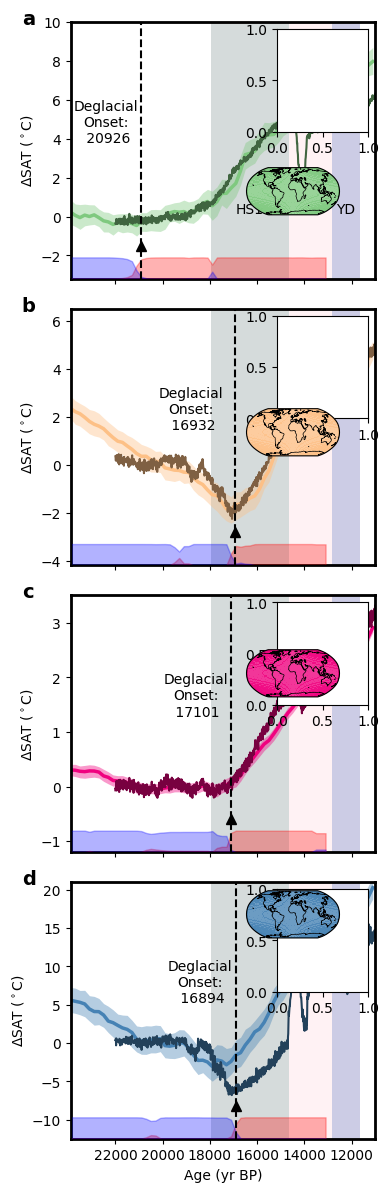

In [43]:
import importlib
import numpy as np
import matplotlib.pyplot as plt
from toolbox import change_point_functions as cpf
importlib.reload(cpf)
from matplotlib.colors import ListedColormap
import cartopy.crs as ccrs
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Create a figure with 4 rows and 1 column
fig, axs = plt.subplots(4, 1, figsize=(4, 12), dpi=100, sharex=True)

if len(all_weighted_avg_curves[0]) <= 4:
    custom_colors = [
        (0.4980392156862745, 0.788235294117647, 0.4980392156862745),
        (0.9921568627450981, 0.7529411764705882, 0.5254901960784314),
        (0.9411764705882353, 0.00784313725490196, 0.4980392156862745),
        (0.27450980392156865, 0.5098039215686274, 0.7058823529411765),
    ]
    cmap = ListedColormap(custom_colors)
else:
    cmap = plt.get_cmap('Accent', len(all_weighted_avg_curves[0]))

custom_colors_1 = [
    (0.24901960784313726, 0.3941176470588235, 0.24901960784313726),
    (0.49607843137254903, 0.3764705882352941, 0.2627450980392157),
    (0.47058823529411764, 0.00392156862745098, 0.24901960784313726),
    (0.13725490196078433, 0.2549019607843137, 0.35294117647058826),
]
cmap1 = ListedColormap(custom_colors_1)

# Climate transitions timing
HS1 = np.array([18000, 14692]) - 50  # Convert to b1950
BA = np.array([14692, 12896]) - 50
YD = np.array([12896, 11703]) - 50

ylims = [[-3.2, 10], [-4.2, 6.5], [-1.2, 3.5], [-12.5, 21]]

# Extract lat/lon for plotting
lat = ds_sat['lat'].values
lon = ds_sat['lon'].values
lat_trace = ds_TraCE_EOFs_GMM['lat'].values
lon_trace = ds_TraCE_EOFs_GMM['lon'].values

# Create 2D grids for pcolormesh
lon2d, lat2d = np.meshgrid(lon, lat)
lon2d_trace, lat2d_trace = np.meshgrid(lon_trace, lat_trace)

# Loop through the range 0 to 3
for i in range(4):
    ax1 = axs[i]

    weighted_avg_curves_k = [
        curves[i] for curves in all_weighted_avg_curves if i in curves
    ]

    # Normalize each data
    for j in range(len(weighted_avg_curves_k)):
        data = weighted_avg_curves_k[j]
        data_18100_21000 = np.mean(data[35:55])
        data = data - data_18100_21000
        weighted_avg_curves_k[j] = data

    # Calculate percentiles and median
    weighted_avg_curves_k_25th = np.percentile(weighted_avg_curves_k, 25, axis=0)
    weighted_avg_curves_k_75th = np.percentile(weighted_avg_curves_k, 75, axis=0)
    weighted_avg_curves_k_median = np.median(weighted_avg_curves_k, axis=0)

    # Calculate cp_info
    cp_info = cpf.find_cp(weighted_avg_curves_k_median, ds_sat['age'].values, rb_plot=False)
    cpOccPr = cp_info['cpOccPr']
    slpSgnPosPr = cp_info['slpSgnPosPr']
    age = cp_info['age']
    cp_age = cp_info['cp_age']

    ax1.set_ylim(ylims[i])

    # Plot climate transitions
    ax1.axvspan(HS1[1], HS1[0], color='darkslategray', alpha=0.2, lw=0)
    ax1.axvspan(BA[1], BA[0], color='pink', alpha=0.2, lw=0)
    ax1.axvspan(YD[1], YD[0], color='navy', alpha=0.2, lw=0)

    # Plot change point marker
    ax1.errorbar(
        cp_age_bootstrap[i],
        np.min(ax1.get_ylim()) + 0.129 * (np.max(ax1.get_ylim()) - np.min(ax1.get_ylim())),
        fmt='^',
        color='k',
        markersize=7,
        capsize=5,
        capthick=2,
        elinewidth=2,
    )

    if i == 0:
        ax1.text(
            x=np.mean(HS1),
            y=np.min(ax1.get_ylim()) + 0.3 * (np.max(ax1.get_ylim()) - np.min(ax1.get_ylim())),
            s='HS1',
            ha='center',
            va='top',
        )
        ax1.text(
            x=np.mean(BA),
            y=np.min(ax1.get_ylim()) + 0.3 * (np.max(ax1.get_ylim()) - np.min(ax1.get_ylim())),
            s='BA',
            ha='center',
            va='top',
        )
        ax1.text(
            x=np.mean(YD),
            y=np.min(ax1.get_ylim()) + 0.3 * (np.max(ax1.get_ylim()) - np.min(ax1.get_ylim())),
            s='YD',
            ha='center',
            va='top',
        )

    # Fill between percentiles
    ax1.fill_between(
        ds_sat['age'].values,
        weighted_avg_curves_k_25th,
        weighted_avg_curves_k_75th,
        color=cmap(i),
        alpha=0.4,
        linewidth=0,
    )

    # Plot median curve
    ax1.plot(ds_sat['age'], weighted_avg_curves_k_median, color=cmap(i), linewidth=2.5)

    # Plot TraCE data
    TraCE_base = np.mean(TraCE_weighted_avg[i][0:401])
    ax1.plot(
        ds_TraCE_EOFs_GMM['age'],
        (TraCE_weighted_avg[i] - TraCE_base) * 1.6,
        color=cmap1(i),
        linewidth=1.5,
        linestyle='-',
    )

    # Set x-axis label only for the bottom subplot
    if i == 3:
        ax1.set_xlabel('Age (yr BP)')
    ax1.set_xlim([11000, 23900])
    ax1.invert_xaxis()
    ax1.set_ylabel('ΔSAT ($^\circ$C)', color='k')

    # Customize spines
    for spine in ax1.spines.values():
        spine.set_linewidth(2)

    # Twin axis for probabilities
    ax2 = ax1.twinx()
    ax2.set_ylim([0, 12])
    ax2.set_yticks([])
    ax2.set_yticklabels([])

    # Fill areas under probabilities
    ax2.fill_between(age, slpSgnPosPr, color='r', alpha=0.3)
    ax2.fill_between(age, 1 - slpSgnPosPr, color='b', alpha=0.3)
    ax2.axvline(x=cp_age_bootstrap[i], color='k', linestyle='--')

    # Add text for change point age
    age_text = str(int(cp_age_bootstrap[i]))
    ax2.text(
        x=cp_age + 1500,
        y=0.7 * np.max(ax2.get_ylim()),
        s='Deglacial\nOnset:\n ' + age_text,
        ha='center',
        va='top',
    )

    # Add subplot labels
    ax1.text(
        x=-0.16,
        y=1.05,
        s=chr(97 + i),
        transform=ax1.transAxes,
        fontsize=14,
        fontweight='bold',
        va='top',
    )

    # -------------------------
    # Add a small global map inset
    # -------------------------
    inset_ax = inset_axes(ax1, width="30%", height="40%", loc='upper right')
    inset_ax = plt.axes([0, 0, 1, 1], projection=ccrs.Robinson())
    # Positioning the inset axes relative to the parent ax1
    # Adjust these values as needed to get the desired position
    # For example:
    bbox = ax1.get_position()
    # Position inset at top-right corner within parent axes
    x0, y0 = bbox.x0 + bbox.width*0.65, bbox.y0 + bbox.height*0.55
    inset_ax.set_position([x0, y0, 0.3*bbox.width, 0.4*bbox.height])

    inset_ax.set_global()
    inset_ax.coastlines(linewidth=0.5)

    # Mask for current class in ds_sat
    class_mask_sat = (ds_sat['class_relabeled'].values == i).astype(float)
    # Mask for current class in ds_TraCE_EOFs_GMM
    class_mask_trace = (ds_TraCE_EOFs_GMM['class_labels_updated'].values == i).astype(float)

    # Plot ds_sat class mask (lighter shading)
    inset_ax.pcolormesh(lon2d, lat2d, class_mask_sat, 
                        transform=ccrs.PlateCarree(), 
                        cmap=ListedColormap([cmap(i)]), alpha=0.3)

    # Plot ds_TraCE class mask (darker shading)
    inset_ax.pcolormesh(lon2d_trace, lat2d_trace, class_mask_trace, 
                        transform=ccrs.PlateCarree(), 
                        cmap=ListedColormap([cmap(i)]), alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.show()


/Progress:100.0% done[==============================================================]
pospr_diff_max_index: 13
cps [15. 25. 30. 37. 45.]
selected_cp_index: 0
-Progress:100.0% done[==============================================================]
pospr_diff_max_index: 33
cps [14. 23. 33. 40. 48.]
selected_cp_index: 2
\Progress:100.0% done[==============================================================]
pospr_diff_max_index: 33
cps [ 7. 14. 34. 51.]
selected_cp_index: 2
|Progress:100.0% done[==============================================================]
pospr_diff_max_index: 34
cps [17. 26. 35. 42.]
selected_cp_index: 2


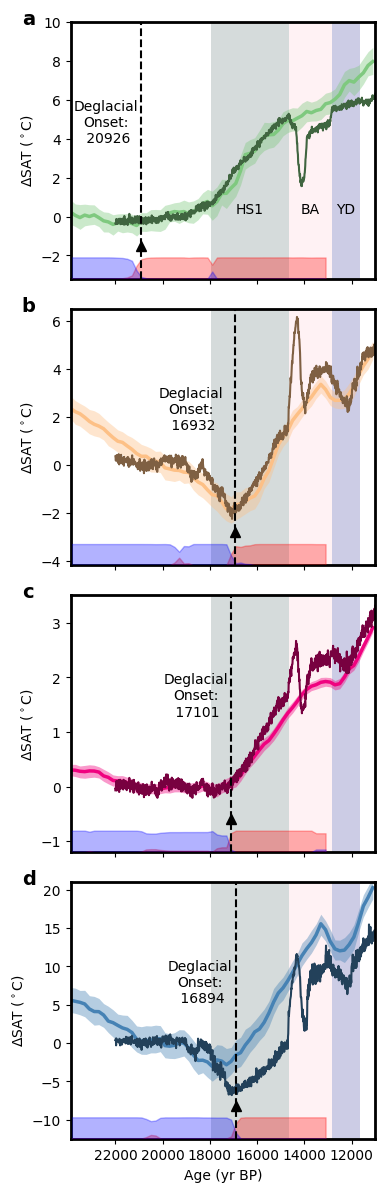

In [38]:
import importlib
import numpy as np
import matplotlib.pyplot as plt
from toolbox import change_point_functions as cpf
importlib.reload(cpf)
from matplotlib.colors import ListedColormap

# Create a figure with 4 rows and 1 column
fig, axs = plt.subplots(4, 1, figsize=(4, 12), dpi=100, sharex=True)

if len(all_weighted_avg_curves[0]) <= 4:
    custom_colors = [
        (0.4980392156862745, 0.788235294117647, 0.4980392156862745),
        (0.9921568627450981, 0.7529411764705882, 0.5254901960784314),
        (0.9411764705882353, 0.00784313725490196, 0.4980392156862745),
        (0.27450980392156865, 0.5098039215686274, 0.7058823529411765),
    ]
    cmap = ListedColormap(custom_colors)
else:
    cmap = plt.get_cmap('Accent', len(all_weighted_avg_curves[0]))

custom_colors_1 = [
    (0.24901960784313726, 0.3941176470588235, 0.24901960784313726),
    (0.49607843137254903, 0.3764705882352941, 0.2627450980392157),
    (0.47058823529411764, 0.00392156862745098, 0.24901960784313726),
    (0.13725490196078433, 0.2549019607843137, 0.35294117647058826),
]
cmap1 = ListedColormap(custom_colors_1)

# Climate transitions timing
HS1 = np.array([18000, 14692]) - 50  # Convert to b1950
BA = np.array([14692, 12896]) - 50
YD = np.array([12896, 11703]) - 50

ylims = [[-3.2, 10], [-4.2, 6.5], [-1.2, 3.5], [-12.5, 21]]

# Loop through the range 0 to 3
for i in range(4):
    ax1 = axs[i]

    weighted_avg_curves_k = [
        curves[i] for curves in all_weighted_avg_curves if i in curves
    ]

    # Loop through each data and normalize
    for j in range(len(weighted_avg_curves_k)):
        data = weighted_avg_curves_k[j]
        data_18100_21000 = np.mean(data[35:55])
        data = data - data_18100_21000
        weighted_avg_curves_k[j] = data

    # Calculate percentiles
    weighted_avg_curves_k_5th = np.percentile(weighted_avg_curves_k, 5, axis=0)
    weighted_avg_curves_k_25th = np.percentile(weighted_avg_curves_k, 25, axis=0)
    weighted_avg_curves_k_75th = np.percentile(weighted_avg_curves_k, 75, axis=0)
    weighted_avg_curves_k_95th = np.percentile(weighted_avg_curves_k, 95, axis=0)

    # Calculate median
    weighted_avg_curves_k_median = np.median(weighted_avg_curves_k, axis=0)

    # Calculate cp_info
    cp_info = cpf.find_cp(weighted_avg_curves_k_median, ds_sat['age'].values, rb_plot=False)
    cpOccPr = cp_info['cpOccPr']
    slpSgnPosPr = cp_info['slpSgnPosPr']
    age = cp_info['age']
    cp_age = cp_info['cp_age']
    cp_age_CI = cp_info['cp_age_CI']
    cp_age_all = cp_info['cp_age_all']

    ax1.set_ylim(ylims[i])

    # Plot climate transitions
    ax1.axvspan(HS1[1], HS1[0], color='darkslategray', alpha=0.2, lw=0)
    ax1.axvspan(BA[1], BA[0], color='pink', alpha=0.2, lw=0)
    ax1.axvspan(YD[1], YD[0], color='navy', alpha=0.2, lw=0)

    # # Plot change points
    # cp_age_all = np.delete(cp_age_all, np.where(cp_age_all == cp_age))
    # ax1.plot(
    #     cp_age_all,
    #     np.min(ax1.get_ylim()) + 0.129 * (np.max(ax1.get_ylim()) - np.min(ax1.get_ylim())) * np.ones_like(cp_age_all),
    #     marker='^',
    #     markersize=7,
    #     color='k',
    #     linestyle='None',
    # )
    ax1.errorbar(
        cp_age_bootstrap[i],
        np.min(ax1.get_ylim()) + 0.129 * (np.max(ax1.get_ylim()) - np.min(ax1.get_ylim())),
        fmt='^',
        color='k',
        markersize=7,
        capsize=5,
        capthick=2,
        elinewidth=2,
    )

    if i == 0:
        ax1.text(
            x=np.mean(HS1),
            y=np.min(ax1.get_ylim()) + 0.3 * (np.max(ax1.get_ylim()) - np.min(ax1.get_ylim())),
            s='HS1',
            ha='center',
            va='top',
        )
        ax1.text(
            x=np.mean(BA),
            y=np.min(ax1.get_ylim()) + 0.3 * (np.max(ax1.get_ylim()) - np.min(ax1.get_ylim())),
            s='BA',
            ha='center',
            va='top',
        )
        ax1.text(
            x=np.mean(YD),
            y=np.min(ax1.get_ylim()) + 0.3 * (np.max(ax1.get_ylim()) - np.min(ax1.get_ylim())),
            s='YD',
            ha='center',
            va='top',
        )

    # Fill between percentiles
    ax1.fill_between(
        ds_sat['age'].values,
        weighted_avg_curves_k_25th,
        weighted_avg_curves_k_75th,
        color=cmap(i),
        alpha=0.4,
        linewidth=0,
    )

    ax1.plot(ds_sat['age'], weighted_avg_curves_k_median, color=cmap(i), linewidth=2.5)

    # Calculate and plot TraCE data
    TraCE_base = np.mean(TraCE_weighted_avg[i][0:401])
    ax1.plot(
        ds_TraCE_EOFs_GMM['age'],
        (TraCE_weighted_avg[i] - TraCE_base) * 1.6,
        color=cmap1(i),
        linewidth=1.5,
        linestyle='-',
    )

    # Set x-axis label only for the bottom subplot
    if i == 3:
        ax1.set_xlabel('Age (yr BP)')
    ax1.set_xlim([11000, 23900])
    ax1.invert_xaxis()
    ax1.set_ylabel('ΔSAT ($^\circ$C)', color='k')

    # Customize spines
    for spine in ax1.spines.values():
        spine.set_linewidth(2)

    # Twin axis for probabilities
    ax2 = ax1.twinx()
    ax2.set_ylim([0, 12])
    ax2.set_yticks([])
    ax2.set_yticklabels([])

    # Fill areas under probabilities
    ax2.fill_between(age, slpSgnPosPr, color='r', alpha=0.3)
    ax2.fill_between(age, 1 - slpSgnPosPr, color='b', alpha=0.3)
    ax2.axvline(x=cp_age_bootstrap[i], color='k', linestyle='--')

    # Add text for change point age
    age_text = str(int(cp_age_bootstrap[i]))
    ax2.text(
        x=cp_age + 1500,
        y=0.7 * np.max(ax2.get_ylim()),
        s='Deglacial\nOnset:\n ' + age_text,
        ha='center',
        va='top',
    )

    # Add subplot labels
    ax1.text(
        x=-0.16,
        y=1.05,
        s=chr(97 + i),
        transform=ax1.transAxes,
        fontsize=14,
        fontweight='bold',
        va='top',
    )

# Adjust layout
plt.tight_layout()
plt.show()


\Progress:100.0% done[==============================================================]
pospr_diff_max_index: 13
cps [15. 25. 30. 37. 45.]
selected_cp_index: 0
|Progress:100.0% done[==============================================================]
pospr_diff_max_index: 33
cps [14. 23. 33. 40. 48.]
selected_cp_index: 2
/Progress:100.0% done[==============================================================]
pospr_diff_max_index: 33
cps [ 7. 14. 30. 34. 51.]
selected_cp_index: 3
-Progress:100.0% done[==============================================================]
pospr_diff_max_index: 34
cps [17. 26. 35. 42.]
selected_cp_index: 2


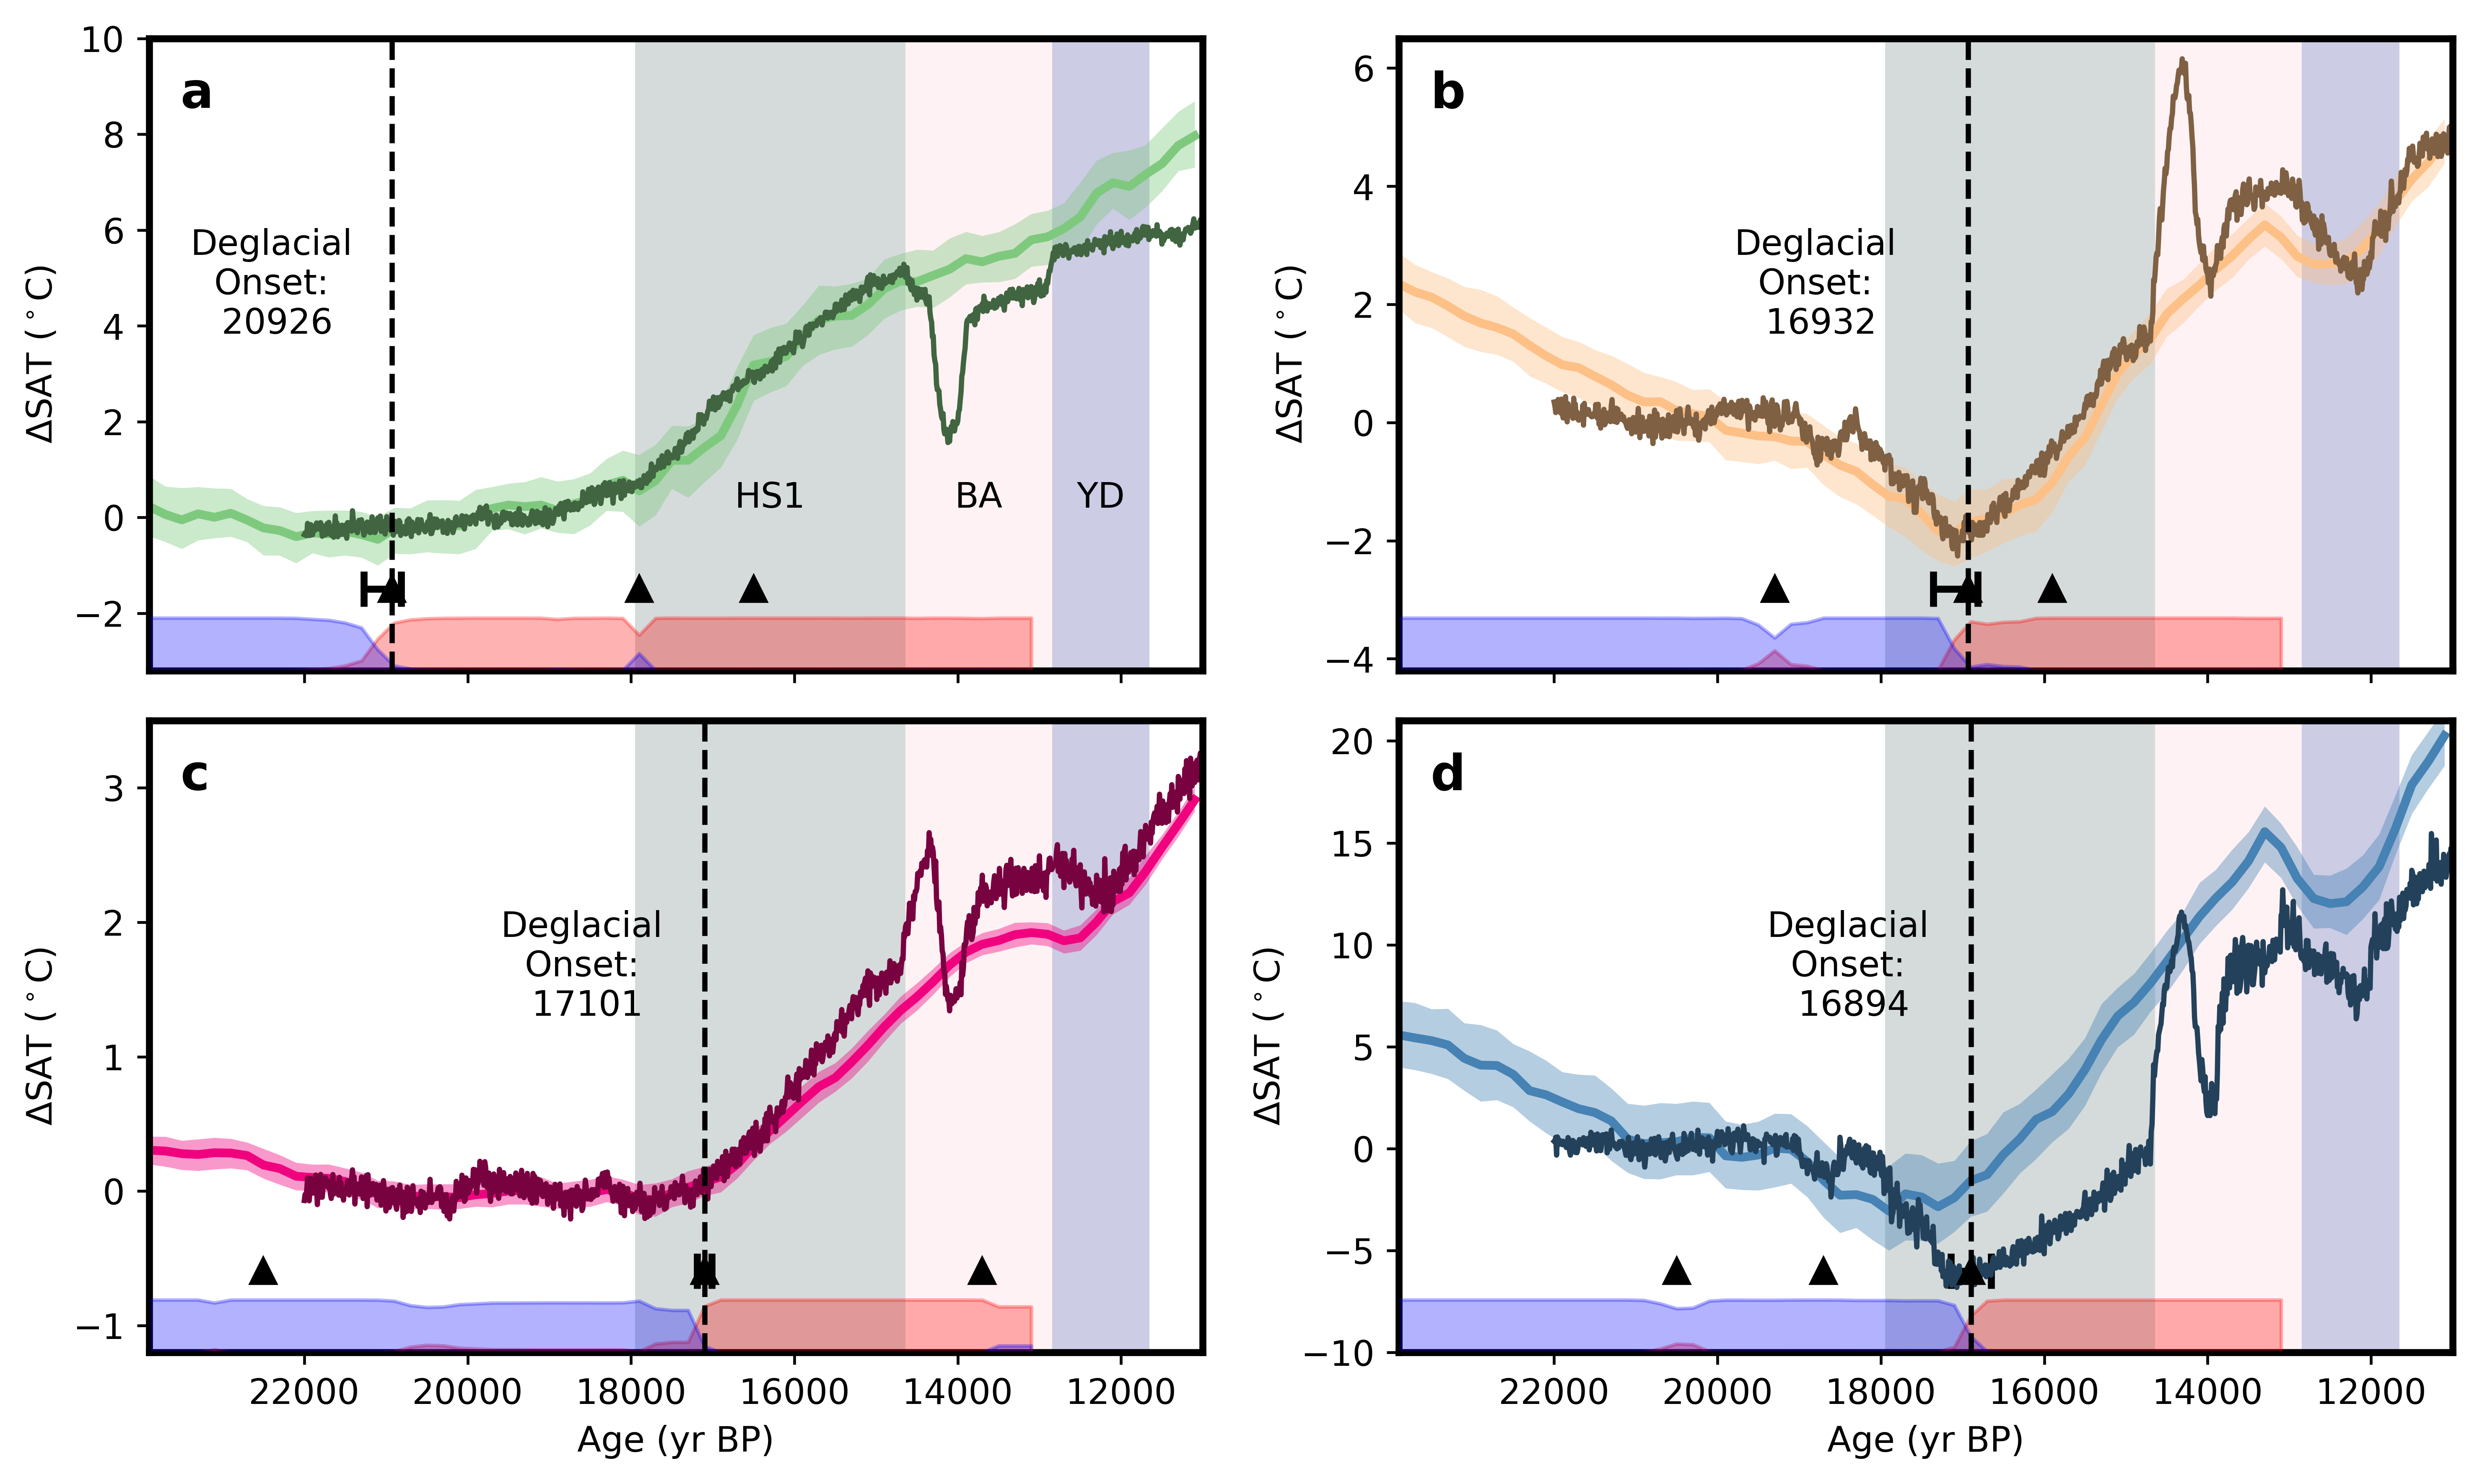

In [24]:
import importlib
import numpy as np
import matplotlib.pyplot as plt
from toolbox import change_point_functions as cpf
importlib.reload(cpf)
from matplotlib.colors import ListedColormap

# Create a figure with 2 rows and 2 columns
fig, axs = plt.subplots(2, 2, figsize=(10, 6), dpi=600, sharex=True)

if len(all_weighted_avg_curves[0]) <= 4:
    custom_colors = [
        (0.4980392156862745, 0.788235294117647, 0.4980392156862745),
        (0.9921568627450981, 0.7529411764705882, 0.5254901960784314),
        (0.9411764705882353, 0.00784313725490196, 0.4980392156862745),
        (0.27450980392156865, 0.5098039215686274, 0.7058823529411765),
    ]
    cmap = ListedColormap(custom_colors)
else:
    cmap = plt.get_cmap('Accent', len(all_weighted_avg_curves[0]))

custom_colors_1 = [
    (0.24901960784313726, 0.3941176470588235, 0.24901960784313726),
    (0.49607843137254903, 0.3764705882352941, 0.2627450980392157),
    (0.47058823529411764, 0.00392156862745098, 0.24901960784313726),
    (0.13725490196078433, 0.2549019607843137, 0.35294117647058826),
]
cmap1 = ListedColormap(custom_colors_1)

# Climate transitions timing
HS1 = np.array([18000, 14692]) - 50  # Convert to b1950
BA = np.array([14692, 12896]) - 50
YD = np.array([12896, 11703]) - 50

ylims = [[-3.2, 10], [-4.2, 6.5], [-1.2, 3.5], [-10, 21]]

# Loop through the range 0 to 3
for i in range(4):
    # Determine the row and column index for 2x2 grid
    row = i // 2
    col = i % 2

    # Get the current axis
    ax1 = axs[row, col]

    weighted_avg_curves_k = [
        curves[i] for curves in all_weighted_avg_curves if i in curves
    ]

    # Loop through each data and normalize
    for j in range(len(weighted_avg_curves_k)):
        data = weighted_avg_curves_k[j]
        data_18100_21000 = np.mean(data[35:55])
        data = data - data_18100_21000
        weighted_avg_curves_k[j] = data

    # Calculate percentiles
    weighted_avg_curves_k_5th = np.percentile(weighted_avg_curves_k, 5, axis=0)
    weighted_avg_curves_k_25th = np.percentile(weighted_avg_curves_k, 25, axis=0)
    weighted_avg_curves_k_75th = np.percentile(weighted_avg_curves_k, 75, axis=0)
    weighted_avg_curves_k_95th = np.percentile(weighted_avg_curves_k, 95, axis=0)

    # Calculate median
    weighted_avg_curves_k_median = np.median(weighted_avg_curves_k, axis=0)

    # Calculate cp_info
    cp_info = cpf.find_cp(weighted_avg_curves_k_median, ds_sat['age'].values, rb_plot=False)
    cpOccPr = cp_info['cpOccPr']
    slpSgnPosPr = cp_info['slpSgnPosPr']
    age = cp_info['age']
    cp_age = cp_info['cp_age']
    cp_age_CI = cp_info['cp_age_CI']
    cp_age_all = cp_info['cp_age_all']

    ax1.set_ylim(ylims[i])

    # Plot climate transitions
    ax1.axvspan(HS1[1], HS1[0], color='darkslategray', alpha=0.2, lw=0)
    ax1.axvspan(BA[1], BA[0], color='pink', alpha=0.2, lw=0)
    ax1.axvspan(YD[1], YD[0], color='navy', alpha=0.2, lw=0)

    # Plot change points
    cp_age_all = np.delete(cp_age_all, np.where(cp_age_all == cp_age))
    ax1.plot(
        cp_age_all,
        np.min(ax1.get_ylim()) + 0.129 * (np.max(ax1.get_ylim()) - np.min(ax1.get_ylim())) * np.ones_like(cp_age_all),
        marker='^',
        markersize=7,
        color='k',
        linestyle='None',
    )
    ax1.errorbar(
        cp_age_bootstrap[i],
        np.min(ax1.get_ylim()) + 0.129 * (np.max(ax1.get_ylim()) - np.min(ax1.get_ylim())),
        xerr=[
            [cp_age_bootstrap[i] - cp_age_bootstrap_CI[i, 1]],
            [cp_age_bootstrap_CI[i, 0] - cp_age_bootstrap[i]],
        ],
        fmt='^',
        color='k',
        markersize=7,
        capsize=5,
        capthick=2,
        elinewidth=2,
    )

    if i == 0:
        ax1.text(
            x=np.mean(HS1),
            y=np.min(ax1.get_ylim()) + 0.3 * (np.max(ax1.get_ylim()) - np.min(ax1.get_ylim())),
            s='HS1',
            ha='center',
            va='top',
        )
        ax1.text(
            x=np.mean(BA),
            y=np.min(ax1.get_ylim()) + 0.3 * (np.max(ax1.get_ylim()) - np.min(ax1.get_ylim())),
            s='BA',
            ha='center',
            va='top',
        )
        ax1.text(
            x=np.mean(YD),
            y=np.min(ax1.get_ylim()) + 0.3 * (np.max(ax1.get_ylim()) - np.min(ax1.get_ylim())),
            s='YD',
            ha='center',
            va='top',
        )

    # Fill between percentiles
    ax1.fill_between(
        ds_sat['age'].values,
        weighted_avg_curves_k_25th,
        weighted_avg_curves_k_75th,
        color=cmap(i),
        alpha=0.4,
        linewidth=0,
    )

    ax1.plot(ds_sat['age'], weighted_avg_curves_k_median, color=cmap(i), linewidth=2.5)

    # Calculate and plot TraCE data
    TraCE_base = np.mean(TraCE_weighted_avg[i][0:401])
    ax1.plot(
        ds_TraCE_EOFs_GMM['age'],
        (TraCE_weighted_avg[i] - TraCE_base) * 1.6,
        color=cmap1(i),
        linewidth=1.5,
        linestyle='-',
    )

    # Set x-axis labels only for bottom plots
    if row == 1:
        ax1.set_xlabel('Age (yr BP)')
    ax1.set_xlim([11000, 23900])
    ax1.invert_xaxis()
    ax1.set_ylabel('ΔSAT ($^\circ$C)', color='k')

    # Customize spines
    for spine in ax1.spines.values():
        spine.set_linewidth(2)

    # Twin axis for probabilities
    ax2 = ax1.twinx()
    ax2.set_ylim([0, 12])

    # hide the yticks and yticklabels
    ax2.set_yticks([])
    ax2.set_yticklabels([])

    # Fill areas under probabilities
    ax2.fill_between(age, slpSgnPosPr, color='r', alpha=0.3)
    ax2.fill_between(age, 1 - slpSgnPosPr, color='b', alpha=0.3)
    ax2.axvline(x=cp_age_bootstrap[i], color='k', linestyle='--')

    # Add text for change point age
    age_text = str(int(cp_age_bootstrap[i]))
    ax2.text(
        x=cp_age + 1500,
        y=0.7 * np.max(ax2.get_ylim()),
        s='Deglacial\nOnset:\n ' + age_text,
        ha='center',
        va='top',
    )

    # Add subplot labels
    ax1.text(
        x=0.03,
        y=0.95,
        s=chr(97 + i),
        transform=ax1.transAxes,
        fontsize=14,
        fontweight='bold',
        va='top',
    )

# Adjust layout
plt.tight_layout()
plt.show()


\Progress:100.0% done[==============================================================]
pospr_diff_max_index: 13
cps [15. 25. 30. 37. 45.]
selected_cp_index: 0
cp_age: 20900.0
age_CI_text: 21865-20408
|Progress:100.0% done[==============================================================]
pospr_diff_max_index: 33
cps [14. 23. 33. 40. 48.]
selected_cp_index: 2
cp_age: 17300.0
age_CI_text: 17656-16728
/Progress:100.0% done[==============================================================]
pospr_diff_max_index: 33
cps [ 7. 14. 30. 34. 51.]
selected_cp_index: 3
cp_age: 17100.0
age_CI_text: 17291-16626
-Progress:100.0% done[==============================================================]
pospr_diff_max_index: 34
cps [17. 26. 35. 42.]
selected_cp_index: 2
cp_age: 16900.0
age_CI_text: 17373-16504


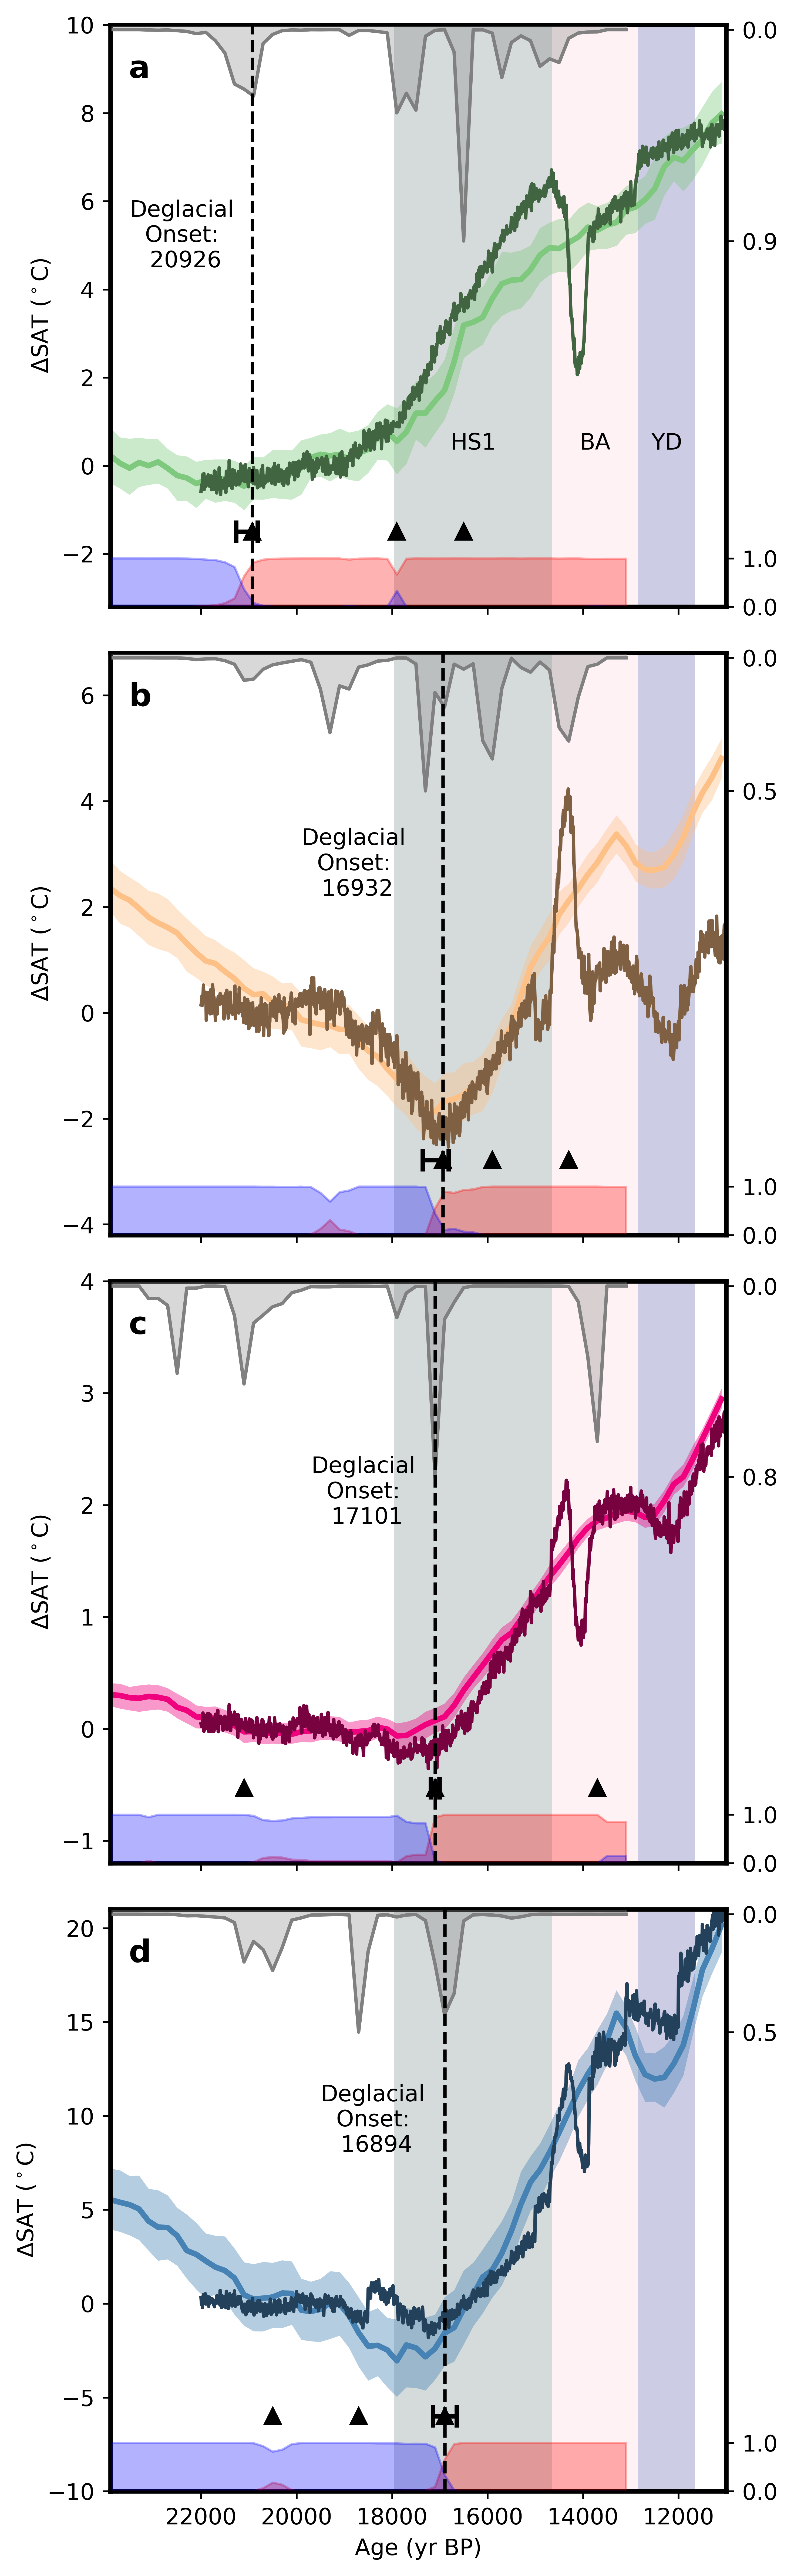

In [10]:
import importlib
import numpy as np
import matplotlib.pyplot as plt
from toolbox import change_point_functions as cpf
importlib.reload(cpf)
from matplotlib.colors import ListedColormap



# Create a figure with 4 rows and 1 column
fig, axs = plt.subplots(4, 1, figsize=(5, 16),dpi=600,sharex=True)
# cmap = plt.get_cmap('Accent', 4)

if len(all_weighted_avg_curves[0]) <= 4:
    custom_colors = [
    (0.4980392156862745, 0.788235294117647, 0.4980392156862745),
    (0.9921568627450981, 0.7529411764705882, 0.5254901960784314),
    (0.9411764705882353, 0.00784313725490196, 0.4980392156862745),
    (0.27450980392156865, 0.5098039215686274, 0.7058823529411765),]

    # Create a ListedColormap object with your custom colors
    cmap = ListedColormap(custom_colors)   
else:
    cmap = plt.get_cmap('Accent', len(all_weighted_avg_curves[0]))


custom_colors_1=[(0.24901960784313726, 0.3941176470588235, 0.24901960784313726),
 (0.49607843137254903, 0.3764705882352941, 0.2627450980392157),
 (0.47058823529411764, 0.00392156862745098, 0.24901960784313726),
 (0.13725490196078433, 0.2549019607843137, 0.35294117647058826)]

# Create a ListedColormap object with your custom colors
cmap1 = ListedColormap(custom_colors_1)


# Add climate transitions timing
HS1 = np.array([18000, 14692]) - 50  # convert to b1950
BA = np.array([14692, 12896]) - 50
YD = np.array([12896, 11703]) - 50

ylims=[[-3.2,10],[-4.2,6.8],[-1.2,4],[-10,21]]

# Loop through the range 0 to 3
for i in range(4):

    
    # Get the current axis
    ax1 = axs[i]


    weighted_avg_curves_k = [curves[i] for curves in all_weighted_avg_curves if i in curves]

    
    # loop through each data in weighted_avg_curves_k and calculate the mean between index 35 to 54 (correpsonding to 18100 to 21000 BP)
    for j in range(len(weighted_avg_curves_k)):
        data=weighted_avg_curves_k[j]
        data_18100_21000=np.mean(data[35:55])
        data=data-data_18100_21000
        weighted_avg_curves_k[j]=data
    

    # calculate the 5th, 25th, 75th and 95th percentile of the weighted_avg_curves_k
    weighted_avg_curves_k_5th=np.percentile(weighted_avg_curves_k,5,axis=0)
    weighted_avg_curves_k_25th=np.percentile(weighted_avg_curves_k,25,axis=0)
    weighted_avg_curves_k_75th=np.percentile(weighted_avg_curves_k,75,axis=0)
    weighted_avg_curves_k_95th=np.percentile(weighted_avg_curves_k,95,axis=0)


    # calculate the median of the weighted_avg_curves_k
    weighted_avg_curves_k_median=np.median(weighted_avg_curves_k,axis=0)

    # Calculate the cp_info for the median of each dataset
    cp_info = cpf.find_cp(weighted_avg_curves_k_median, ds_sat['age'].values, rb_plot=False)
    
    # Extract data for plotting from cp_info
    # data_flipped = cp_info['data_flipped']
    cpOccPr = cp_info['cpOccPr']
    slpSgnPosPr = cp_info['slpSgnPosPr']
    age = cp_info['age']
    cp_age = cp_info['cp_age']
    cp_age_CI=cp_info['cp_age_CI']
    cp_age_all=cp_info['cp_age_all']






    ax1.set_ylim(ylims[i])

    # Plot grey bars for HS1, BA, and YD periods
    ax1.axvspan(HS1[1], HS1[0], color='darkslategray', alpha=0.2, lw=0)
    ax1.axvspan(BA[1], BA[0], color='pink', alpha=0.2, lw=0)
    ax1.axvspan(YD[1], YD[0], color='navy', alpha=0.2, lw=0)


    # plot triangles at x=cp_age_all and y=np.min(ax1.get_ylim())+0.2 * (np.max(ax1.get_ylim())-np.min(ax1.get_ylim()))
    # find the value in the cp_age_all that equals to cp_age and drop it
    cp_age_all = np.delete(cp_age_all, np.where(cp_age_all == cp_age))

    ax1.plot(cp_age_all, np.min(ax1.get_ylim())+0.129 * (np.max(ax1.get_ylim())-np.min(ax1.get_ylim())) * np.ones_like(cp_age_all), marker='^', markersize=7, color='k', linestyle='None')
    # add the error bar for the cp ci
    # if i==0:
    ax1.errorbar(cp_age_bootstrap[i], np.min(ax1.get_ylim())+0.129 * (np.max(ax1.get_ylim())-np.min(ax1.get_ylim())), xerr=[[cp_age_bootstrap[i]-cp_age_bootstrap_CI[i,1]],[cp_age_bootstrap_CI[i,0]-cp_age_bootstrap[i]]], fmt='^', color='k', markersize=7, capsize=5, capthick=2, elinewidth=2)
        
    # else:
        # ax1.errorbar(cp_age, np.min(ax1.get_ylim())+0.129 * (np.max(ax1.get_ylim())-np.min(ax1.get_ylim())), xerr=[[cp_age-cp_age_CI[1]],[cp_age_CI[0]-cp_age]], fmt='^', color='k', markersize=7, capsize=5, capthick=2, elinewidth=2)
    # ax1.plot(cp_age, np.min(ax1.get_ylim())+0.129 * (np.max(ax1.get_ylim())-np.min(ax1.get_ylim())) * np.ones_like(cp_age), marker='^', markersize=7, color='k', linestyle='None')

    if i==0:
        ax1.text(x=np.mean(HS1), y=np.min(ax1.get_ylim())+0.3 * (np.max(ax1.get_ylim())-np.min(ax1.get_ylim())), s='HS1', ha='center', va='top')
        ax1.text(x=np.mean(BA), y=np.min(ax1.get_ylim())+0.3 * (np.max(ax1.get_ylim())-np.min(ax1.get_ylim())), s='BA', ha='center', va='top')
        ax1.text(x=np.mean(YD), y=np.min(ax1.get_ylim())+0.3 * (np.max(ax1.get_ylim())-np.min(ax1.get_ylim())), s='YD', ha='center', va='top')


    # fill the area betwen 5th and 95th percentile with light grey with alpha=0.3, hide the line
    # ax1.fill_between(ds_sat['age'].values,weighted_avg_curves_k_5th,weighted_avg_curves_k_95th,color=cmap(i),alpha=0.15,linewidth=0)

    # fill the area between 25th and 75th percentile with light blue with alpha=0.5
    ax1.fill_between(ds_sat['age'].values,weighted_avg_curves_k_25th,weighted_avg_curves_k_75th,color=cmap(i),alpha=0.4,linewidth=0)



    ax1.plot(ds_sat['age'], weighted_avg_curves_k_median, color=cmap(i),linewidth=2.5)

    # # interpolate the ds_sat['age'], weighted_avg_curves_k_median at age=21000
    # LGMR_base=np.interp(21000, ds_sat['age'], weighted_avg_curves_k_median)
    # ax1.plot(ds_sat['age'], weighted_avg_curves_k_median-LGMR_base, color=cmap(i),linewidth=2.5)

    # calculate the mean of traces between 18000 to 22000 BP (index 0 to 400)
    TraCE_base=np.mean(TraCE_weighted_avg_LGMR_mask[i][0:401])
    # Plot TraCE data, relative to 21000 BP    
    ax1.plot(ds_trace['age'], (TraCE_weighted_avg_LGMR_mask[i]-TraCE_base)*1.6, color=cmap1(i),linewidth=1.5,linestyle='-')
    # ax1.plot(ds_trace['age'], (TraCE_weighted_avg_LGMR_mask[i]-TraCE_base), color=cmap1(i),linewidth=1.5,linestyle='-')
    


    if i==3:
        ax1.set_xlabel('Age (yr BP)')
    # set x-axis limits
    ax1.set_xlim([11000,23900])


    # invert the x-axis
    ax1.invert_xaxis()
    # Make the y-axis label and tick labels match the line color.
    ax1.set_ylabel('ΔSAT ($^\circ$C)', color='k')
    
    ax1.spines['left'].set_linewidth(2)
    ax1.spines['bottom'].set_linewidth(2)
    ax1.spines['right'].set_linewidth(2)
    ax1.spines['top'].set_linewidth(2)





    # Create a twin axis
    ax2 = ax1.twinx()
    # set the y-axis limits
    ax2.set_ylim([0, 12])
    # get the ylim
    ylim = ax2.get_ylim()



    # fill the areas under slpSgnPosPr and 1-slpSgnPosPr to light red and light blue respectively
    # ax2.fill_between(age, slpSgnPosPr, color='r', alpha=0.3)
    # ax2.fill_between(age, 1 - slpSgnPosPr, color='b', alpha=0.3)

    ax2.fill_between(age, slpSgnPosPr, color='r', alpha=0.3)
    ax2.fill_between(age, 1 - slpSgnPosPr, color='b', alpha=0.3)



    # Plot the probability of the change points
    scaled_cpOccPr = (np.max(ylim)-cpOccPr*5)-0.1
    ax2.plot(age, scaled_cpOccPr, 'grey', label='cpOccPr')
    
    ax2.fill_between(age, scaled_cpOccPr, np.max(ylim), color='grey', alpha=0.3)

    # set y ticks
    ax2.set_yticks([0, 1, np.min(scaled_cpOccPr),np.max(scaled_cpOccPr)])
    #  set y tick labels
    ax2.set_yticklabels(['0.0', '1.0', str(np.round(np.max(cpOccPr),1)), str(np.round(np.min(cpOccPr),1))])






    # plot a vertical line at cp_age
    # ax2.axvline(x=cp_age, color='k', linestyle='--')
    # plot a vertical line at cp_age_bootstraps
    ax2.axvline(x=cp_age_bootstrap[i], color='k', linestyle='--')

    # add text to show the cp_age
    age_text=str(int(cp_age_bootstrap[i]))
    ax2.text(x=cp_age+1500, y=0.7 * np.max(ax2.get_ylim()), s='Deglacial\nOnset:\n '+age_text, ha='center', va='top')
    # add text to show the cp_age_CI
    age_CI_text=str(int(cp_age_CI[0]))+'-'+str(int(cp_age_CI[1]))
    # ax2.text(x=cp_age_CI[0]+800, y=0.6 * np.max(ax2.get_ylim()), s='CP CI: '+age_CI_text, ha='center', va='top')
    print('cp_age:', cp_age)
    print('age_CI_text:',age_CI_text)

    # add a, b, c and d to the subplots
    ax1.text(x=0.03, y=0.95, s=chr(97+i), transform=ax1.transAxes, fontsize=14, fontweight='bold', va='top')

    
    # Adjust layout
    plt.tight_layout()

# Display the figure
plt.show()


\Progress:100.0% done[==============================================================]
pospr_diff_max_index: 13
cps [15. 25. 30. 37. 45.]
selected_cp_index: 0
cp_age: 20900.0
age_CI_text: 21928-20387
|Progress:100.0% done[==============================================================]
pospr_diff_max_index: 33
cps [15. 23. 33. 40. 48.]
selected_cp_index: 2
cp_age: 17300.0
age_CI_text: 17634-16748
/Progress:100.0% done[==============================================================]
pospr_diff_max_index: 33
cps [ 7. 14. 30. 34. 51.]
selected_cp_index: 3
cp_age: 17100.0
age_CI_text: 17290-16668
-Progress:100.0% done[==============================================================]
pospr_diff_max_index: 34
cps [17. 26. 35. 42.]
selected_cp_index: 2
cp_age: 16900.0
age_CI_text: 17351-16508


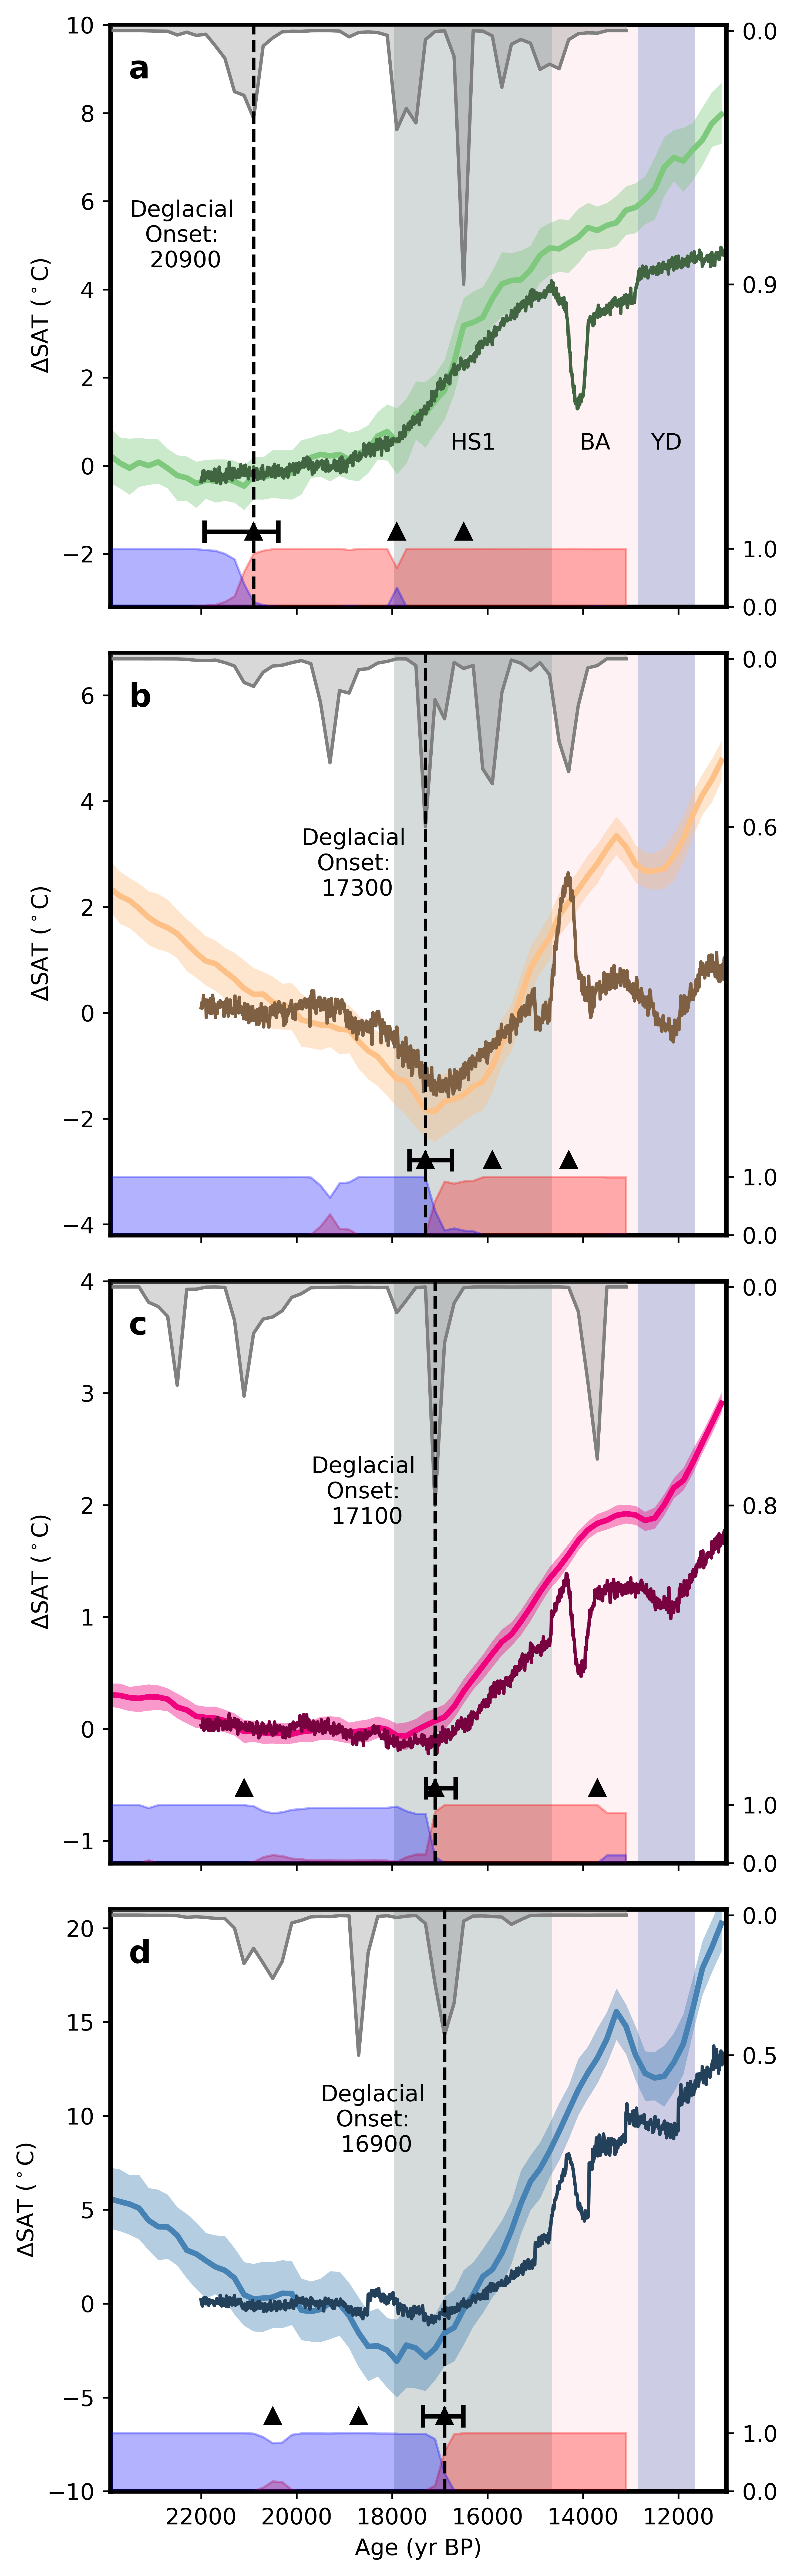

In [14]:
import importlib
import numpy as np
import matplotlib.pyplot as plt
from toolbox import change_point_functions as cpf
importlib.reload(cpf)
from matplotlib.colors import ListedColormap



# Create a figure with 4 rows and 1 column
fig, axs = plt.subplots(4, 1, figsize=(5, 16),dpi=600,sharex=True)
# cmap = plt.get_cmap('Accent', 4)

if len(all_weighted_avg_curves[0]) <= 4:
    custom_colors = [
    (0.4980392156862745, 0.788235294117647, 0.4980392156862745),
    (0.9921568627450981, 0.7529411764705882, 0.5254901960784314),
    (0.9411764705882353, 0.00784313725490196, 0.4980392156862745),
    (0.27450980392156865, 0.5098039215686274, 0.7058823529411765),]

    # Create a ListedColormap object with your custom colors
    cmap = ListedColormap(custom_colors)   
else:
    cmap = plt.get_cmap('Accent', len(all_weighted_avg_curves[0]))


custom_colors_1=[(0.24901960784313726, 0.3941176470588235, 0.24901960784313726),
 (0.49607843137254903, 0.3764705882352941, 0.2627450980392157),
 (0.47058823529411764, 0.00392156862745098, 0.24901960784313726),
 (0.13725490196078433, 0.2549019607843137, 0.35294117647058826)]

# Create a ListedColormap object with your custom colors
cmap1 = ListedColormap(custom_colors_1)


# Add climate transitions timing
HS1 = np.array([18000, 14692]) - 50  # convert to b1950
BA = np.array([14692, 12896]) - 50
YD = np.array([12896, 11703]) - 50

ylims=[[-3.2,10],[-4.2,6.8],[-1.2,4],[-10,21]]

# Loop through the range 0 to 3
for i in range(4):

    
    # Get the current axis
    ax1 = axs[i]


    weighted_avg_curves_k = [curves[i] for curves in all_weighted_avg_curves if i in curves]

    
    # loop through each data in weighted_avg_curves_k and calculate the mean between index 35 to 54 (correpsonding to 18100 to 21000 BP)
    for j in range(len(weighted_avg_curves_k)):
        data=weighted_avg_curves_k[j]
        data_18100_21000=np.mean(data[35:55])
        data=data-data_18100_21000
        weighted_avg_curves_k[j]=data
    

    # calculate the 5th, 25th, 75th and 95th percentile of the weighted_avg_curves_k
    weighted_avg_curves_k_5th=np.percentile(weighted_avg_curves_k,5,axis=0)
    weighted_avg_curves_k_25th=np.percentile(weighted_avg_curves_k,25,axis=0)
    weighted_avg_curves_k_75th=np.percentile(weighted_avg_curves_k,75,axis=0)
    weighted_avg_curves_k_95th=np.percentile(weighted_avg_curves_k,95,axis=0)


    # calculate the median of the weighted_avg_curves_k
    weighted_avg_curves_k_median=np.median(weighted_avg_curves_k,axis=0)

    # Calculate the cp_info for the median of each dataset
    cp_info = cpf.find_cp(weighted_avg_curves_k_median, ds_sat['age'].values, rb_plot=False)
    
    # Extract data for plotting from cp_info
    # data_flipped = cp_info['data_flipped']
    cpOccPr = cp_info['cpOccPr']
    slpSgnPosPr = cp_info['slpSgnPosPr']
    age = cp_info['age']
    cp_age = cp_info['cp_age']
    cp_age_CI=cp_info['cp_age_CI']
    cp_age_all=cp_info['cp_age_all']






    ax1.set_ylim(ylims[i])

    # Plot grey bars for HS1, BA, and YD periods
    ax1.axvspan(HS1[1], HS1[0], color='darkslategray', alpha=0.2, lw=0)
    ax1.axvspan(BA[1], BA[0], color='pink', alpha=0.2, lw=0)
    ax1.axvspan(YD[1], YD[0], color='navy', alpha=0.2, lw=0)


    # plot triangles at x=cp_age_all and y=np.min(ax1.get_ylim())+0.2 * (np.max(ax1.get_ylim())-np.min(ax1.get_ylim()))
    ax1.plot(cp_age_all, np.min(ax1.get_ylim())+0.129 * (np.max(ax1.get_ylim())-np.min(ax1.get_ylim())) * np.ones_like(cp_age_all), marker='^', markersize=7, color='k', linestyle='None')
    # add the error bar for the cp ci
    ax1.errorbar(cp_age, np.min(ax1.get_ylim())+0.129 * (np.max(ax1.get_ylim())-np.min(ax1.get_ylim())), xerr=[[cp_age-cp_age_CI[1]],[cp_age_CI[0]-cp_age]], fmt='none', color='k', capsize=5, capthick=2, elinewidth=2)
    # ax1.plot(cp_age, np.min(ax1.get_ylim())+0.129 * (np.max(ax1.get_ylim())-np.min(ax1.get_ylim())) * np.ones_like(cp_age), marker='^', markersize=7, color='k', linestyle='None')

    if i==0:
        ax1.text(x=np.mean(HS1), y=np.min(ax1.get_ylim())+0.3 * (np.max(ax1.get_ylim())-np.min(ax1.get_ylim())), s='HS1', ha='center', va='top')
        ax1.text(x=np.mean(BA), y=np.min(ax1.get_ylim())+0.3 * (np.max(ax1.get_ylim())-np.min(ax1.get_ylim())), s='BA', ha='center', va='top')
        ax1.text(x=np.mean(YD), y=np.min(ax1.get_ylim())+0.3 * (np.max(ax1.get_ylim())-np.min(ax1.get_ylim())), s='YD', ha='center', va='top')


    # fill the area betwen 5th and 95th percentile with light grey with alpha=0.3, hide the line
    # ax1.fill_between(ds_sat['age'].values,weighted_avg_curves_k_5th,weighted_avg_curves_k_95th,color=cmap(i),alpha=0.15,linewidth=0)

    # fill the area between 25th and 75th percentile with light blue with alpha=0.5
    ax1.fill_between(ds_sat['age'].values,weighted_avg_curves_k_25th,weighted_avg_curves_k_75th,color=cmap(i),alpha=0.4,linewidth=0)



    ax1.plot(ds_sat['age'], weighted_avg_curves_k_median, color=cmap(i),linewidth=2.5)

    # # interpolate the ds_sat['age'], weighted_avg_curves_k_median at age=21000
    # LGMR_base=np.interp(21000, ds_sat['age'], weighted_avg_curves_k_median)
    # ax1.plot(ds_sat['age'], weighted_avg_curves_k_median-LGMR_base, color=cmap(i),linewidth=2.5)

    # calculate the mean of traces between 18000 to 22000 BP (index 0 to 400)
    TraCE_base=np.mean(TraCE_weighted_avg_LGMR_mask[i][0:401])
    # Plot TraCE data, relative to 21000 BP    
    # ax1.plot(ds_trace['age'], (TraCE_weighted_avg_LGMR_mask[i]-TraCE_base)*1.6, color=cmap1(i),linewidth=1.5,linestyle='-')
    ax1.plot(ds_trace['age'], (TraCE_weighted_avg_LGMR_mask[i]-TraCE_base), color=cmap1(i),linewidth=1.5,linestyle='-')
    


    if i==3:
        ax1.set_xlabel('Age (yr BP)')
    # set x-axis limits
    ax1.set_xlim([11000,23900])


    # invert the x-axis
    ax1.invert_xaxis()
    # Make the y-axis label and tick labels match the line color.
    ax1.set_ylabel('ΔSAT ($^\circ$C)', color='k')
    
    ax1.spines['left'].set_linewidth(2)
    ax1.spines['bottom'].set_linewidth(2)
    ax1.spines['right'].set_linewidth(2)
    ax1.spines['top'].set_linewidth(2)





    # Create a twin axis
    ax2 = ax1.twinx()
    # set the y-axis limits
    ax2.set_ylim([0, 10])
    # get the ylim
    ylim = ax2.get_ylim()



    # fill the areas under slpSgnPosPr and 1-slpSgnPosPr to light red and light blue respectively
    # ax2.fill_between(age, slpSgnPosPr, color='r', alpha=0.3)
    # ax2.fill_between(age, 1 - slpSgnPosPr, color='b', alpha=0.3)

    ax2.fill_between(age, slpSgnPosPr, color='r', alpha=0.3)
    ax2.fill_between(age, 1 - slpSgnPosPr, color='b', alpha=0.3)



    # Plot the probability of the change points
    scaled_cpOccPr = (np.max(ylim)-cpOccPr*5)-0.1
    ax2.plot(age, scaled_cpOccPr, 'grey', label='cpOccPr')
    
    ax2.fill_between(age, scaled_cpOccPr, np.max(ylim), color='grey', alpha=0.3)

    # set y ticks
    ax2.set_yticks([0, 1, np.min(scaled_cpOccPr),np.max(scaled_cpOccPr)])
    #  set y tick labels
    ax2.set_yticklabels(['0.0', '1.0', str(np.round(np.max(cpOccPr),1)), str(np.round(np.min(cpOccPr),1))])






    # plot a vertical line at cp_age
    ax2.axvline(x=cp_age, color='k', linestyle='--')
    # add text to show the cp_age
    age_text=str(int(cp_age))
    ax2.text(x=cp_age+1500, y=0.7 * np.max(ax2.get_ylim()), s='Deglacial\nOnset:\n '+age_text, ha='center', va='top')
    # add text to show the cp_age_CI
    age_CI_text=str(int(cp_age_CI[0]))+'-'+str(int(cp_age_CI[1]))
    # ax2.text(x=cp_age_CI[0]+800, y=0.6 * np.max(ax2.get_ylim()), s='CP CI: '+age_CI_text, ha='center', va='top')
    print('cp_age:', cp_age)
    print('age_CI_text:',age_CI_text)

    # add a, b, c and d to the subplots
    ax1.text(x=0.03, y=0.95, s=chr(97+i), transform=ax1.transAxes, fontsize=14, fontweight='bold', va='top')

    
    # Adjust layout
    plt.tight_layout()

# Display the figure
plt.show()


# Same, but the data was first interpolated to 1-yr resolution

|Progress:100.0% done[==============================================================]
pospr_diff_max_index: 144
cps [ 66. 145. 206. 248. 295. 350. 368. 464. 572. 594.]
selected_cp_index: 1
age_CI_text: 21289-20925
/Progress:100.0% done[==============================================================]
pospr_diff_max_index: 329
cps [138. 197. 244. 329. 394. 434. 468. 534. 577. 581.]
selected_cp_index: 3
age_CI_text: 17339-17240
-Progress:100.0% done[==============================================================]
pospr_diff_max_index: 567
cps [ 65. 137. 200. 298. 351. 414. 500. 537. 568. 598.]
selected_cp_index: 8
age_CI_text: 12597-12457
\Progress:100.0% done[==============================================================]
pospr_diff_max_index: 564
cps [138. 196. 242. 270. 305. 338. 420. 530. 564. 593.]
selected_cp_index: 8
age_CI_text: 12677-12557


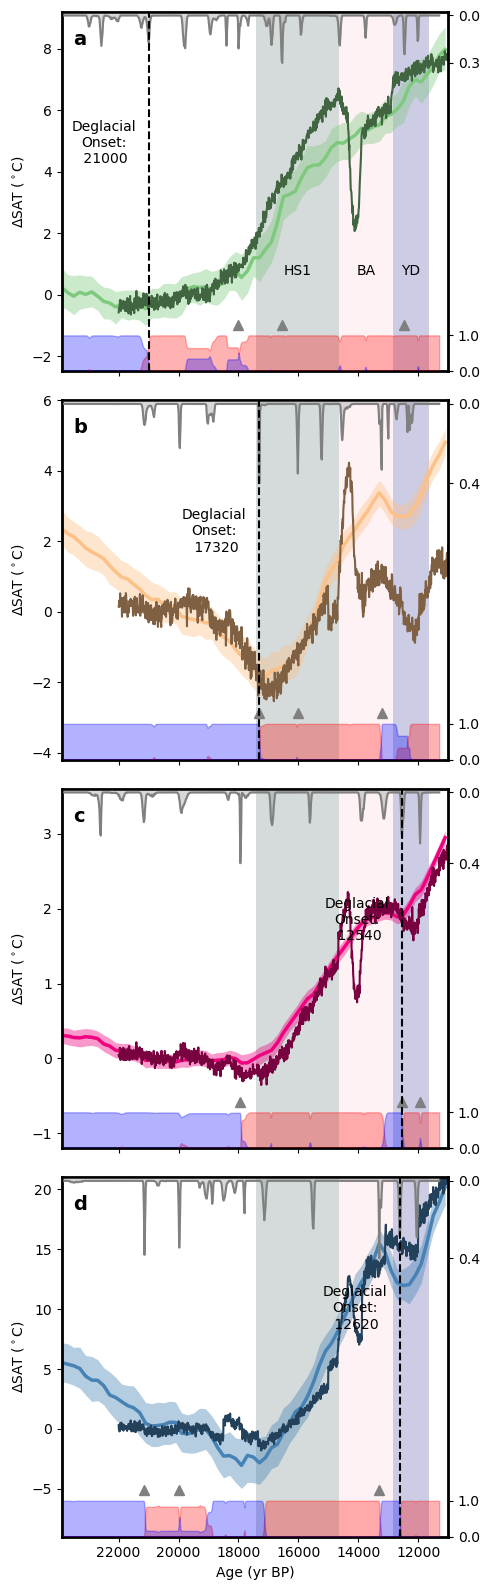

In [21]:
import importlib
import numpy as np
import matplotlib.pyplot as plt
from toolbox import change_point_functions as cpf
importlib.reload(cpf)
from matplotlib.colors import ListedColormap



# Create a figure with 4 rows and 1 column
fig, axs = plt.subplots(4, 1, figsize=(5, 16),dpi=100,sharex=True)
# cmap = plt.get_cmap('Accent', 4)

if len(all_weighted_avg_curves[0]) <= 4:
    custom_colors = [
    (0.4980392156862745, 0.788235294117647, 0.4980392156862745),
    (0.9921568627450981, 0.7529411764705882, 0.5254901960784314),
    (0.9411764705882353, 0.00784313725490196, 0.4980392156862745),
    (0.27450980392156865, 0.5098039215686274, 0.7058823529411765),]

    # Create a ListedColormap object with your custom colors
    cmap = ListedColormap(custom_colors)   
else:
    cmap = plt.get_cmap('Accent', len(all_weighted_avg_curves[0]))


custom_colors_1=[(0.24901960784313726, 0.3941176470588235, 0.24901960784313726),
 (0.49607843137254903, 0.3764705882352941, 0.2627450980392157),
 (0.47058823529411764, 0.00392156862745098, 0.24901960784313726),
 (0.13725490196078433, 0.2549019607843137, 0.35294117647058826)]

# Create a ListedColormap object with your custom colors
cmap1 = ListedColormap(custom_colors_1)


# Add climate transitions timing
HS1 = np.array([18000, 14692]) - 50  # convert to b1950
BA = np.array([14692, 12896]) - 50
YD = np.array([12896, 11703]) - 50

ylims=[[-2.5,9.2],[-4.2,6],[-1.2,3.6],[-9,21]]

# Loop through the range 0 to 3
for i in range(4):

    
    # Get the current axis
    ax1 = axs[i]


    weighted_avg_curves_k = [curves[i] for curves in all_weighted_avg_curves if i in curves]

    
    # loop through each data in weighted_avg_curves_k and calculate the mean between index 35 to 54 (correpsonding to 18100 to 21000 BP)
    for j in range(len(weighted_avg_curves_k)):
        data=weighted_avg_curves_k[j]
        data_18100_21000=np.mean(data[35:55])
        data=data-data_18100_21000
        weighted_avg_curves_k[j]=data
    

    # calculate the 5th, 25th, 75th and 95th percentile of the weighted_avg_curves_k
    weighted_avg_curves_k_5th=np.percentile(weighted_avg_curves_k,5,axis=0)
    weighted_avg_curves_k_25th=np.percentile(weighted_avg_curves_k,25,axis=0)
    weighted_avg_curves_k_75th=np.percentile(weighted_avg_curves_k,75,axis=0)
    weighted_avg_curves_k_95th=np.percentile(weighted_avg_curves_k,95,axis=0)


    # calculate the median of the weighted_avg_curves_k
    weighted_avg_curves_k_median=np.median(weighted_avg_curves_k,axis=0)

    age_step=20
    # interpolate the ds_sat['age'], weighted_avg_curves_k_median to 1 yr resolution
    age_interp=np.arange(ds_sat['age'].values[0],ds_sat['age'].values[-1]+1,age_step)
    weighted_avg_curves_k_median_interp=np.interp(age_interp,ds_sat['age'].values,weighted_avg_curves_k_median)

    # Calculate the cp_info for the median of each dataset
    # cp_info = cpf.find_cp(weighted_avg_curves_k_median, ds_sat['age'].values, rb_plot=False)
    cp_info = cpf.find_cp(weighted_avg_curves_k_median_interp, age_interp, age_step=age_step, rb_plot=False)



    
    # Extract data for plotting from cp_info
    # data_flipped = cp_info['data_flipped']
    cpOccPr = cp_info['cpOccPr']
    slpSgnPosPr = cp_info['slpSgnPosPr']
    age = cp_info['age']
    cp_age = cp_info['cp_age']
    cp_age_CI=cp_info['cp_age_CI']
    cp_age_all=cp_info['cp_age_all']






    ax1.set_ylim(ylims[i])

    # Plot grey bars for HS1, BA, and YD periods
    ax1.axvspan(HS1[1], HS1[0], color='darkslategray', alpha=0.2, lw=0)
    ax1.axvspan(BA[1], BA[0], color='pink', alpha=0.2, lw=0)
    ax1.axvspan(YD[1], YD[0], color='navy', alpha=0.2, lw=0)


    # plot triangles at x=cp_age_all and y=np.min(ax1.get_ylim())+0.2 * (np.max(ax1.get_ylim())-np.min(ax1.get_ylim()))
    ax1.plot(cp_age_all, np.min(ax1.get_ylim())+0.129 * (np.max(ax1.get_ylim())-np.min(ax1.get_ylim())) * np.ones_like(cp_age_all), marker='^', markersize=7, color='grey', linestyle='None')
    # ax1.plot(cp_age, np.min(ax1.get_ylim())+0.129 * (np.max(ax1.get_ylim())-np.min(ax1.get_ylim())) * np.ones_like(cp_age), marker='^', markersize=7, color='k', linestyle='None')

    if i==0:
        ax1.text(x=np.mean(HS1), y=np.min(ax1.get_ylim())+0.3 * (np.max(ax1.get_ylim())-np.min(ax1.get_ylim())), s='HS1', ha='center', va='top')
        ax1.text(x=np.mean(BA), y=np.min(ax1.get_ylim())+0.3 * (np.max(ax1.get_ylim())-np.min(ax1.get_ylim())), s='BA', ha='center', va='top')
        ax1.text(x=np.mean(YD), y=np.min(ax1.get_ylim())+0.3 * (np.max(ax1.get_ylim())-np.min(ax1.get_ylim())), s='YD', ha='center', va='top')


    # fill the area betwen 5th and 95th percentile with light grey with alpha=0.3, hide the line
    # ax1.fill_between(ds_sat['age'].values,weighted_avg_curves_k_5th,weighted_avg_curves_k_95th,color=cmap(i),alpha=0.15,linewidth=0)

    # fill the area between 25th and 75th percentile with light blue with alpha=0.5
    ax1.fill_between(ds_sat['age'].values,weighted_avg_curves_k_25th,weighted_avg_curves_k_75th,color=cmap(i),alpha=0.4,linewidth=0)



    ax1.plot(ds_sat['age'], weighted_avg_curves_k_median, color=cmap(i),linewidth=2.5)

    # # interpolate the ds_sat['age'], weighted_avg_curves_k_median at age=21000
    # LGMR_base=np.interp(21000, ds_sat['age'], weighted_avg_curves_k_median)
    # ax1.plot(ds_sat['age'], weighted_avg_curves_k_median-LGMR_base, color=cmap(i),linewidth=2.5)

    # calculate the mean of traces between 18000 to 22000 BP (index 0 to 400)
    TraCE_base=np.mean(TraCE_weighted_avg_LGMR_mask[i][0:401])
    # Plot TraCE data, relative to 21000 BP    
    ax1.plot(ds_trace['age'], (TraCE_weighted_avg_LGMR_mask[i]-TraCE_base)*1.6, color=cmap1(i),linewidth=1.5,linestyle='-')
    


    if i==3:
        ax1.set_xlabel('Age (yr BP)')
    # set x-axis limits
    ax1.set_xlim([11000,23900])


    # invert the x-axis
    ax1.invert_xaxis()
    # Make the y-axis label and tick labels match the line color.
    ax1.set_ylabel('ΔSAT ($^\circ$C)', color='k')
    
    ax1.spines['left'].set_linewidth(2)
    ax1.spines['bottom'].set_linewidth(2)
    ax1.spines['right'].set_linewidth(2)
    ax1.spines['top'].set_linewidth(2)





    # Create a twin axis
    ax2 = ax1.twinx()
    # set the y-axis limits
    ax2.set_ylim([0, 10])
    # get the ylim
    ylim = ax2.get_ylim()



    # fill the areas under slpSgnPosPr and 1-slpSgnPosPr to light red and light blue respectively
    # ax2.fill_between(age, slpSgnPosPr, color='r', alpha=0.3)
    # ax2.fill_between(age, 1 - slpSgnPosPr, color='b', alpha=0.3)

    ax2.fill_between(age, slpSgnPosPr, color='r', alpha=0.3)
    ax2.fill_between(age, 1 - slpSgnPosPr, color='b', alpha=0.3)



    # Plot the probability of the change points
    scaled_cpOccPr = (np.max(ylim)-cpOccPr*5)-0.1
    ax2.plot(age, scaled_cpOccPr, 'grey', label='cpOccPr')
    
    ax2.fill_between(age, scaled_cpOccPr, np.max(ylim), color='grey', alpha=0.3)

    # set y ticks
    ax2.set_yticks([0, 1, np.min(scaled_cpOccPr),np.max(scaled_cpOccPr)])
    #  set y tick labels
    ax2.set_yticklabels(['0.0', '1.0', str(np.round(np.max(cpOccPr),1)), str(np.round(np.min(cpOccPr),1))])






    # plot a vertical line at cp_age
    ax2.axvline(x=cp_age, color='k', linestyle='--')
    # add text to show the cp_age
    age_text=str(int(cp_age))
    ax2.text(x=cp_age+1500, y=0.7 * np.max(ax2.get_ylim()), s='Deglacial\nOnset:\n '+age_text, ha='center', va='top')
    # add text to show the cp_age_CI
    age_CI_text=str(int(cp_age_CI[0]))+'-'+str(int(cp_age_CI[1]))
    # ax2.text(x=cp_age_CI[0]+800, y=0.6 * np.max(ax2.get_ylim()), s='CP CI: '+age_CI_text, ha='center', va='top')
    print('age_CI_text:',age_CI_text)

    # add a, b, c and d to the subplots
    ax1.text(x=0.03, y=0.95, s=chr(97+i), transform=ax1.transAxes, fontsize=14, fontweight='bold', va='top')

    
    # Adjust layout
    plt.tight_layout()

# Display the figure
plt.show()
